In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

# Data Loading and Preliminary Checks

In [3]:
tackles = pd.read_csv("/content/drive/MyDrive/DSGA1007/data/tackles.csv")
games = pd.read_csv("/content/drive/MyDrive/DSGA1007/data/games.csv")
plays = pd.read_csv("/content/drive/MyDrive/DSGA1007/data/plays.csv")
players = pd.read_csv("/content/drive/MyDrive/DSGA1007/data/players.csv")
weekly_tracking = [pd.read_csv(f"/content/drive/MyDrive/DSGA1007/data/tracking_week_{i}.csv") for i in range(1,10)]

In [4]:
plays

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,0.638600,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,0.615241,0.384759,-0.025458,0.025458,1.434580,-0.444642,NaN,NaN,NaN,NaN
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,0.667054,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,0.410611,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN


In [5]:
plays.columns

Index(['gameId', 'playId', 'ballCarrierId', 'ballCarrierDisplayName',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2'],
      dtype='object')

In [6]:
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/06/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/06/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/06/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/06/2022,20:20:00,KC,TEN,20,17


In [7]:
tackles

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1
17422,2022092502,3510,42406,0,0,0,1
17423,2022091113,3642,43478,0,0,0,1
17424,2022091901,3578,42431,0,0,0,1


In [8]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


In [9]:
weekly_tracking[0]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.80,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,football,49,2022-09-12 23:05:57.799999,NaN,football,left,56.220001,9.89,2.56,1.25,0.25,NaN,NaN,tackle
1407435,2022091200,3826,NaN,football,50,2022-09-12 23:05:57.900000,NaN,football,left,56.060001,10.08,2.50,1.14,0.24,NaN,NaN,NaN
1407436,2022091200,3826,NaN,football,51,2022-09-12 23:05:58.000000,NaN,football,left,55.889999,10.27,2.38,1.70,0.25,NaN,NaN,NaN
1407437,2022091200,3826,NaN,football,52,2022-09-12 23:05:58.099999,NaN,football,left,55.730000,10.44,2.07,2.83,0.24,NaN,NaN,NaN


In [10]:
# Print the shape of each dataframe
print('Games shape:', games.shape)
print('Plays shape:', plays.shape)
print('Players shape:', players.shape)
print('Tackles shape:', tackles.shape)
print('Tracking shape:', weekly_tracking[0].shape)

Games shape: (136, 9)
Plays shape: (12486, 35)
Players shape: (1683, 7)
Tackles shape: (17426, 7)
Tracking shape: (1407439, 17)


In [11]:
# Summarize missing values
games.isnull().sum()

gameId               0
season               0
week                 0
gameDate             0
gameTimeEastern      0
homeTeamAbbr         0
visitorTeamAbbr      0
homeFinalScore       0
visitorFinalScore    0
dtype: int64

In [12]:
plays.isnull().sum()

gameId                                  0
playId                                  0
ballCarrierId                           0
ballCarrierDisplayName                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          167
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
passResult                           6381
passLength                           6852
penaltyYards                        11871
prePenaltyPlayResult                    0
playResult                              0
playNullifiedByPenalty                  0
absoluteYardlineNumber                  0
offenseFormation                        4
defendersInTheBox                 

In [13]:
players.isnull().sum()

nflId            0
height           0
weight           0
birthDate      479
collegeName      0
position         0
displayName      0
dtype: int64

In [14]:
tackles.isnull().sum()

gameId              0
playId              0
nflId               0
tackle              0
assist              0
forcedFumble        0
pff_missedTackle    0
dtype: int64

In [15]:
weekly_tracking[0].isnull().sum()

gameId                 0
playId                 0
nflId              61193
displayName            0
frameId                0
time                   0
jerseyNumber       61193
club                   0
playDirection          0
x                      0
y                      0
s                      0
a                      0
dis                    0
o                  61042
dir                61042
event            1277171
dtype: int64

In [16]:
weekly_tracking[0]["event"].unique()

array([nan, 'pass_arrived', 'pass_outcome_caught', 'tackle', 'run',
       'first_contact', 'ball_snap', 'handoff', 'touchdown',
       'out_of_bounds', 'man_in_motion', 'fumble', 'play_action',
       'pass_forward', 'lateral', 'autoevent_passforward',
       'autoevent_passinterrupted', 'line_set', 'qb_slide', 'shift',
       'run_pass_option', 'qb_sack', 'pass_shovel', 'autoevent_ballsnap',
       'snap_direct', 'fumble_defense_recovered',
       'fumble_offense_recovered'], dtype=object)

In [17]:
weekly_tracking[0][weekly_tracking[0]["event"] == "tackle"]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
17,2022090800,56,35472.0,Rodger Saffold,18,2022-09-08 20:24:06.900000,76.0,BUF,left,88.230000,27.09,1.72,0.26,0.18,288.76,302.08,tackle
39,2022090800,56,38577.0,Bobby Wagner,18,2022-09-08 20:24:06.900000,45.0,LA,left,78.620000,32.31,1.76,3.13,0.19,0.84,34.12,tackle
61,2022090800,56,41239.0,Aaron Donald,18,2022-09-08 20:24:06.900000,99.0,LA,left,91.040000,27.66,2.16,1.98,0.22,273.18,263.65,tackle
83,2022090800,56,42392.0,Mitch Morse,18,2022-09-08 20:24:06.900000,60.0,BUF,left,87.200000,30.91,1.70,0.72,0.18,286.32,308.98,tackle
105,2022090800,56,42489.0,Stefon Diggs,18,2022-09-08 20:24:06.900000,14.0,BUF,left,79.330000,33.85,0.62,1.31,0.06,100.54,78.02,tackle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407222,2022091200,3826,52526.0,Albert Okwuegbunam,49,2022-09-12 23:05:57.799999,85.0,DEN,left,53.300000,14.66,3.14,3.23,0.33,157.75,178.48,tackle
1407275,2022091200,3826,53464.0,Javonte Williams,49,2022-09-12 23:05:57.799999,33.0,DEN,left,56.060000,10.39,2.35,1.58,0.23,248.15,332.62,tackle
1407328,2022091200,3826,54505.0,Boye Mafe,49,2022-09-12 23:05:57.799999,53.0,SEA,left,56.730000,7.82,0.98,2.21,0.11,17.90,340.05,tackle
1407381,2022091200,3826,54618.0,Tariq Woolen,49,2022-09-12 23:05:57.799999,27.0,SEA,left,50.750000,6.92,1.88,2.49,0.19,33.48,64.07,tackle


In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [19]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

In [20]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


In [21]:
tackles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            17426 non-null  int64
 1   playId            17426 non-null  int64
 2   nflId             17426 non-null  int64
 3   tackle            17426 non-null  int64
 4   assist            17426 non-null  int64
 5   forcedFumble      17426 non-null  int64
 6   pff_missedTackle  17426 non-null  int64
dtypes: int64(7)
memory usage: 953.1 KB


In [22]:
weekly_tracking[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407439 entries, 0 to 1407438
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1407439 non-null  int64  
 1   playId         1407439 non-null  int64  
 2   nflId          1346246 non-null  float64
 3   displayName    1407439 non-null  object 
 4   frameId        1407439 non-null  int64  
 5   time           1407439 non-null  object 
 6   jerseyNumber   1346246 non-null  float64
 7   club           1407439 non-null  object 
 8   playDirection  1407439 non-null  object 
 9   x              1407439 non-null  float64
 10  y              1407439 non-null  float64
 11  s              1407439 non-null  float64
 12  a              1407439 non-null  float64
 13  dis            1407439 non-null  float64
 14  o              1346397 non-null  float64
 15  dir            1346397 non-null  float64
 16  event          130268 non-null   object 
dtypes: float

# Exploratory Data Analysis (EDA)

How many games, plays, and players are in the dataset?

In [23]:
unique_games = games['gameId'].nunique()
print(f"Number of unique games: {unique_games}")

unique_plays = plays[['gameId', 'playId']].drop_duplicates().shape[0]
print(f"Number of unique plays: {unique_plays}")

unique_players = players['nflId'].nunique()
print(f"Number of unique players: {unique_players}")

Number of unique games: 136
Number of unique plays: 12486
Number of unique players: 1683


What is the distribution of tackles, assists, and missed tackles across players and teams?

In [24]:
# Merge player names into tackles data
tackles_with_names = tackles.merge(players[['nflId', 'displayName']], on='nflId', how='left')

# Aggregating tackle data for each player
player_tackle_stats = tackles_with_names.groupby(['nflId', 'displayName']).agg(total_tackles=('tackle', 'sum'),
                                                  total_assists=('assist', 'sum'),
                                                  total_forced_fumbles=('forcedFumble', 'sum'),
                                                  total_missed_tackles=('pff_missedTackle', 'sum')).reset_index()
player_tackle_stats

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles
0,33131,Calais Campbell,8,10,0,4
1,35449,Tyson Alualu,4,4,0,1
2,35452,Brandon Graham,6,6,0,1
3,35454,Jason Pierre-Paul,3,3,0,1
4,35459,Kareem Jackson,28,23,0,9
...,...,...,...,...,...,...
795,55190,Sam Okuayinonu,1,0,0,0
796,55200,Ryder Anderson,1,0,0,0
797,55239,Prince Emili,0,3,0,0
798,55240,Ja'Marcus Ingram,2,1,0,0


In [25]:
player_tackle_stats.head(10)

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles
0,33131,Calais Campbell,8,10,0,4
1,35449,Tyson Alualu,4,4,0,1
2,35452,Brandon Graham,6,6,0,1
3,35454,Jason Pierre-Paul,3,3,0,1
4,35459,Kareem Jackson,28,23,0,9
5,35466,Devin McCourty,36,9,0,3
6,35470,Jerry Hughes,6,5,0,7
7,35493,Carlos Dunlap,8,5,0,1
8,35522,Corey Peters,2,4,0,0
9,35562,Al Woods,13,9,0,1


In [26]:
top_total_tackle_players = player_tackle_stats.sort_values('total_tackles', ascending=False).head(10)
top_total_tackle_players

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles
492,52435,Jordyn Brooks,61,23,1,10
334,46269,Foyesade Oluokun,59,26,0,11
337,46304,Zaire Franklin,55,28,0,12
63,41243,C.J. Mosley,55,32,0,8
106,42427,Jordan Hicks,54,20,0,5
606,53489,Pete Werner,51,22,2,8
270,46077,Roquan Smith,50,32,0,7
472,48516,T.J. Edwards,49,25,0,8
414,47872,Bobby Okereke,48,23,1,4
605,53487,Nick Bolton,46,23,0,2


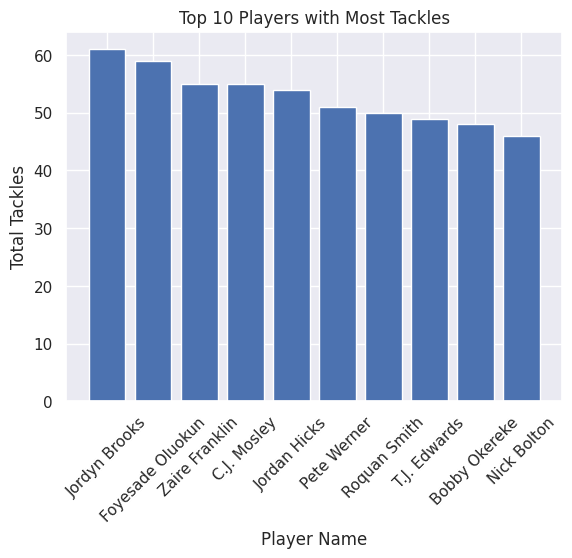

In [27]:
# Visualizing top players with most tackles using their display names
plt.bar(top_total_tackle_players['displayName'], top_total_tackle_players['total_tackles'])
plt.xlabel('Player Name')
plt.xticks(rotation=45)  # Rotate names for better readability
plt.ylabel('Total Tackles')
plt.title('Top 10 Players with Most Tackles')
plt.show()

In [28]:
top_assist_tackle_players = player_tackle_stats.sort_values('total_assists', ascending=False).head(10)
top_assist_tackle_players

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles
279,46091,Rashaan Evans,45,39,1,6
617,53509,Divine Deablo,39,34,0,7
270,46077,Roquan Smith,50,32,0,7
690,54492,Devin Lloyd,34,32,0,12
63,41243,C.J. Mosley,55,32,0,8
439,47956,Cole Holcomb,38,32,0,4
322,46212,Ja'Whaun Bentley,18,31,0,2
407,47855,Germaine Pratt,26,31,0,7
276,46086,Derwin James,37,30,0,5
337,46304,Zaire Franklin,55,28,0,12


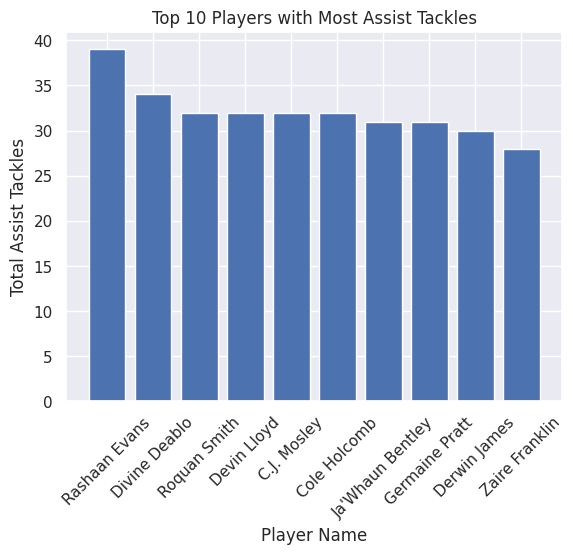

In [29]:
# Visualizing top players with most assist tackles using their display names
plt.bar(top_assist_tackle_players['displayName'], top_assist_tackle_players['total_assists'])
plt.xlabel('Player Name')
plt.xticks(rotation=45)  # Rotate names for better readability
plt.ylabel('Total Assist Tackles')
plt.title('Top 10 Players with Most Assist Tackles')
plt.show()

In [30]:
top_forced_fumble_players = player_tackle_stats.sort_values('total_forced_fumbles', ascending=False).head(10)
top_forced_fumble_players

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles
728,54574,Coby Bryant,29,8,4,8
366,46711,Ryan Neal,24,6,2,3
687,54487,Quay Walker,35,22,2,5
237,44925,Eddie Jackson,45,19,2,10
606,53489,Pete Werner,51,22,2,8
645,53592,Darrick Forrest,26,10,2,2
723,54562,Kerby Joseph,15,10,2,3
187,43700,Jonathan Jones,18,3,2,3
603,53481,Jeremiah Owusu-Koramoah,26,14,2,8
507,52469,Kristian Fulton,22,11,1,9


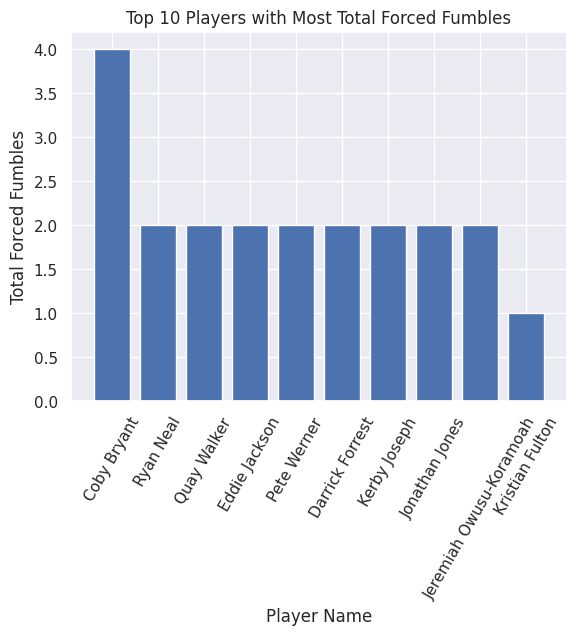

In [31]:
# Visualizing top players with most forced fumbles using their display names
plt.bar(top_forced_fumble_players['displayName'], top_forced_fumble_players['total_forced_fumbles'])
plt.xlabel('Player Name')
plt.xticks(rotation=60)  # Rotate names for better readability
plt.ylabel('Total Forced Fumbles')
plt.title('Top 10 Players with Most Total Forced Fumbles')
plt.show()

In [32]:
top_missed_tackle_players = player_tackle_stats.sort_values('total_missed_tackles', ascending=False).head(10)
top_missed_tackle_players

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles
696,54502,Jalen Pitre,34,20,0,19
238,44926,Rayshawn Jenkins,35,17,0,16
425,47913,Drue Tranquill,43,20,0,13
446,47996,Donovan Wilson,41,13,1,13
584,53445,Zaven Collins,39,24,1,13
351,46527,Frankie Luvu,33,11,1,12
690,54492,Devin Lloyd,34,32,0,12
337,46304,Zaire Franklin,55,28,0,12
209,44848,Budda Baker,44,26,1,11
701,54513,Jaquan Brisker,37,14,0,11


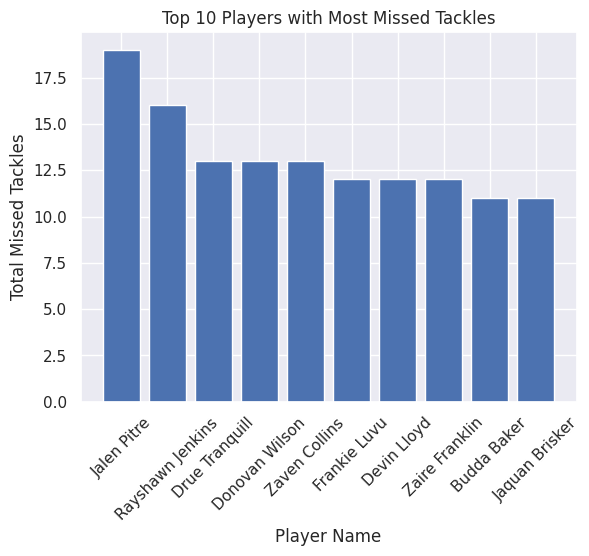

In [33]:
# Visualizing top players with most missed tackles using their display names
plt.bar(top_missed_tackle_players['displayName'], top_missed_tackle_players['total_missed_tackles'])
plt.xlabel('Player Name')
plt.xticks(rotation=45)  # Rotate names for better readability
plt.ylabel('Total Missed Tackles')
plt.title('Top 10 Players with Most Missed Tackles')
plt.show()

What is the distribution of player heights and weights? How do these attributes correlate with tackling efficiency?

In [34]:
# Merge height and weight into the existing player_tackle_stats
player_tackle_stats_with_attributes = player_tackle_stats.merge(players[['nflId', 'height', 'weight', 'position']], on='nflId', how='left')
player_tackle_stats_with_attributes

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height,weight,position
0,33131,Calais Campbell,8,10,0,4,6-8,300,DE
1,35449,Tyson Alualu,4,4,0,1,6-3,304,NT
2,35452,Brandon Graham,6,6,0,1,6-2,265,DE
3,35454,Jason Pierre-Paul,3,3,0,1,6-5,275,DE
4,35459,Kareem Jackson,28,23,0,9,5-10,185,SS
...,...,...,...,...,...,...,...,...,...
795,55190,Sam Okuayinonu,1,0,0,0,6-1,285,DE
796,55200,Ryder Anderson,1,0,0,0,6-6,266,DT
797,55239,Prince Emili,0,3,0,0,6-2,300,DT
798,55240,Ja'Marcus Ingram,2,1,0,0,6-1,185,CB


In [35]:
# Calculate tackling efficiency
player_tackle_stats_with_attributes['tackling_efficiency'] = player_tackle_stats_with_attributes['total_tackles'] / (player_tackle_stats_with_attributes['total_tackles'] + player_tackle_stats_with_attributes['total_missed_tackles'])
player_tackle_stats_with_attributes['tackling_efficiency'].describe()

count    770.000000
mean       0.810888
std        0.189088
min        0.000000
25%        0.750000
50%        0.846154
75%        0.933333
max        1.000000
Name: tackling_efficiency, dtype: float64

In [36]:
# Locate players with only assist tackles
only_assist_tackles = player_tackle_stats_with_attributes[
    (player_tackle_stats_with_attributes['total_tackles'] == 0) &
    (player_tackle_stats_with_attributes['total_missed_tackles'] == 0) &
    (player_tackle_stats_with_attributes['total_assists'] > 0)
]

only_assist_tackles

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height,weight,position,tackling_efficiency
20,37792,Nick Bellore,0,1,0,0,6-1,250,ILB,NaN
73,41358,Dontae Johnson,0,1,0,0,6-2,200,CB,NaN
207,44838,Takkarist McKinley,0,1,0,0,6-2,265,DE,NaN
342,46378,J.T. Gray,0,1,0,0,6-0,202,SS,NaN
354,46630,Jalen Davis,0,1,0,0,5-10,185,CB,NaN
463,48454,C.J. Moore,0,1,0,0,5-11,195,FS,NaN
470,48500,Saivion Smith,0,1,0,0,6-1,200,CB,NaN
476,48555,Luke Gifford,0,1,0,0,6-3,245,OLB,NaN
477,48566,Daniel Wise,0,2,0,0,6-3,279,DE,NaN
481,48780,Troy Reeder,0,1,0,0,6-3,245,ILB,NaN


In [37]:
# There are players with no tackle or missed tackles but only assist tackles
player_tackle_stats_with_attributes['tackling_efficiency'].fillna(0, inplace=True)
player_tackle_stats_with_attributes['tackling_efficiency'].describe()

count    800.000000
mean       0.780479
std        0.241194
min        0.000000
25%        0.729115
50%        0.833333
75%        0.928571
max        1.000000
Name: tackling_efficiency, dtype: float64

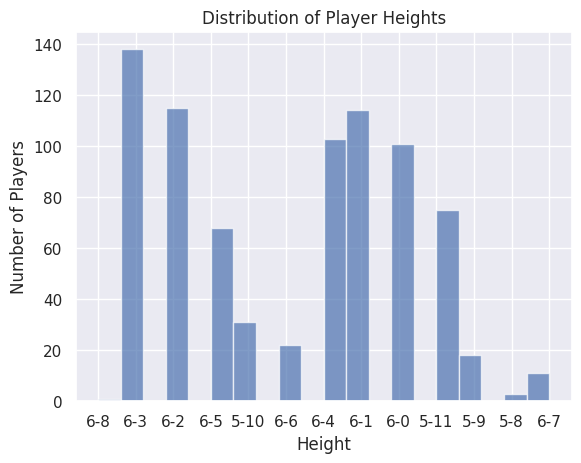

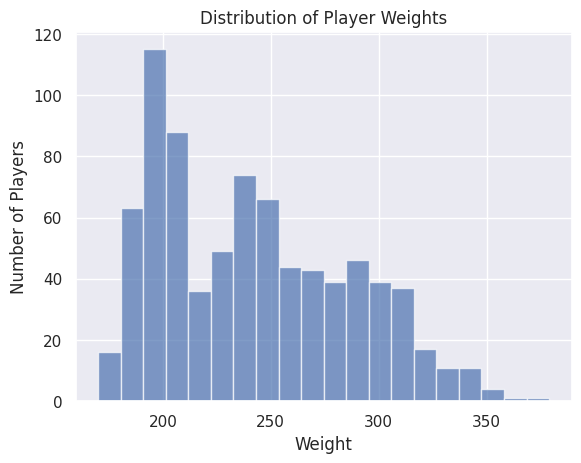

In [38]:
# Histograms for height and weight
plt.hist(player_tackle_stats_with_attributes['height'], bins=20, alpha=0.7)
plt.xlabel('Height')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Heights')
plt.show()

plt.hist(player_tackle_stats_with_attributes['weight'], bins=20, alpha=0.7)
plt.xlabel('Weight')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Weights')
plt.show()

In [39]:
# Create a helper function to help handle the height data
def convert_height_to_inches(height_str: str) -> int:
    """
    Convert a height string in the format 'feet-inches' to inches.

    Parameters:
    height_str (str): A height string in the format 'X-Y', where X is feet and Y is inches.

    Returns:
    int: The height converted to inches. If the format is incorrect, returns None.

    Example:
    >>> convert_height_to_inches("6-2")
    74
    """

    if '-' in height_str:
        feet, inches = height_str.split('-')
        return int(feet) * 12 + int(inches)
    else:
        return None

In [40]:
player_tackle_stats_with_attributes['height_in_inches'] = player_tackle_stats_with_attributes['height'].apply(convert_height_to_inches)
player_tackle_stats_with_attributes

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height,weight,position,tackling_efficiency,height_in_inches
0,33131,Calais Campbell,8,10,0,4,6-8,300,DE,0.666667,80
1,35449,Tyson Alualu,4,4,0,1,6-3,304,NT,0.800000,75
2,35452,Brandon Graham,6,6,0,1,6-2,265,DE,0.857143,74
3,35454,Jason Pierre-Paul,3,3,0,1,6-5,275,DE,0.750000,77
4,35459,Kareem Jackson,28,23,0,9,5-10,185,SS,0.756757,70
...,...,...,...,...,...,...,...,...,...,...,...
795,55190,Sam Okuayinonu,1,0,0,0,6-1,285,DE,1.000000,73
796,55200,Ryder Anderson,1,0,0,0,6-6,266,DT,1.000000,78
797,55239,Prince Emili,0,3,0,0,6-2,300,DT,0.000000,74
798,55240,Ja'Marcus Ingram,2,1,0,0,6-1,185,CB,1.000000,73


In [191]:
def filter_players_by_tackles(df, min_tackles):
    """
    Filter players based on a minimum number of total tackles and missed tackles.

    Args:
        df (DataFrame): DataFrame containing player statistics.
        min_tackles (int): Minimum number of tackles required.

    Returns:
        DataFrame: Filtered DataFrame with players meeting the criteria.
    """
    condition = (df['total_tackles'] + df['total_missed_tackles']) >= min_tackles
    return df[condition]
def plot_attribute_vs_efficiency(df, attribute, efficiency_col='tackling_efficiency'):
    """
    Generates a scatter plot of a player attribute against tackling efficiency.

    Args:
        df (DataFrame): DataFrame containing player statistics.
        attribute (str): Player attribute to plot (e.g., 'height', 'weight').
        efficiency_col (str): Column name for tackling efficiency.

    Returns:
        None: The function plots the scatter plot.
    """
    plt.scatter(df[attribute], df[efficiency_col])
    plt.xlabel(attribute.capitalize())
    plt.ylabel('Tackling Efficiency')
    plt.title(f'{attribute.capitalize()} vs Tackling Efficiency')
    plt.show()
def calculate_and_print_correlations(df, attributes, efficiency_col='tackling_efficiency'):
    """
    Calculates and prints correlation coefficients between player attributes and tackling efficiency.

    Args:
        df (DataFrame): DataFrame containing player statistics.
        attributes (list): List of attributes to calculate correlations for.
        efficiency_col (str): Column name for tackling efficiency.

    Returns:
        None: The function prints the correlation coefficients.
    """
    for attribute in attributes:
        correlation = df[attribute].corr(df[efficiency_col])
        print(f"Correlation coefficient between {attribute} and tackling efficiency: {correlation}")

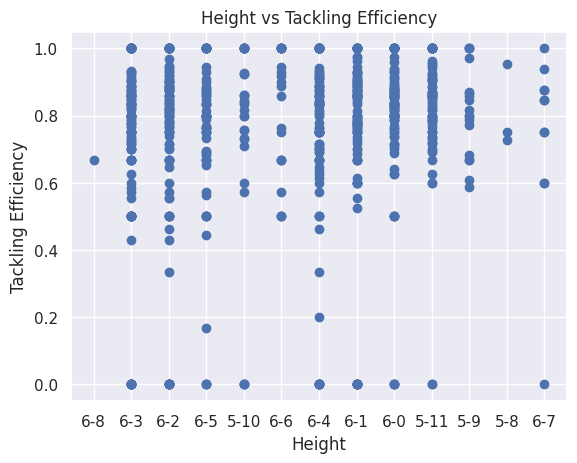

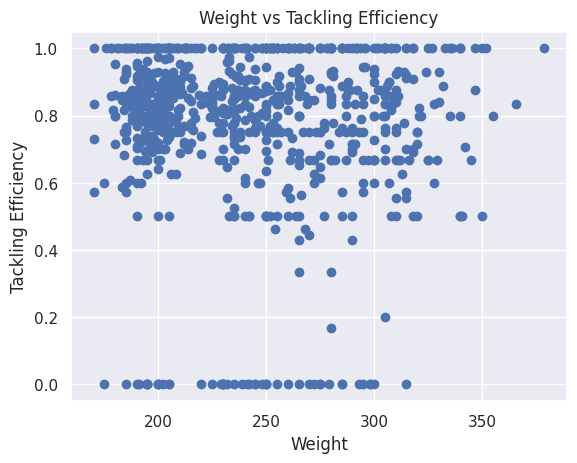

Correlation coefficient between height_in_inches and tackling efficiency: -0.05614582838336486
Correlation coefficient between weight and tackling efficiency: -0.05471977133960498


In [193]:
# Example usage
min_tackles_required = 0
filtered_players = filter_players_by_tackles(player_tackle_stats_with_attributes, min_tackles_required)

# Plotting
plot_attribute_vs_efficiency(filtered_players, 'height')
plot_attribute_vs_efficiency(filtered_players, 'weight')

# Calculating and printing correlations
calculate_and_print_correlations(filtered_players, ['height_in_inches', 'weight'])

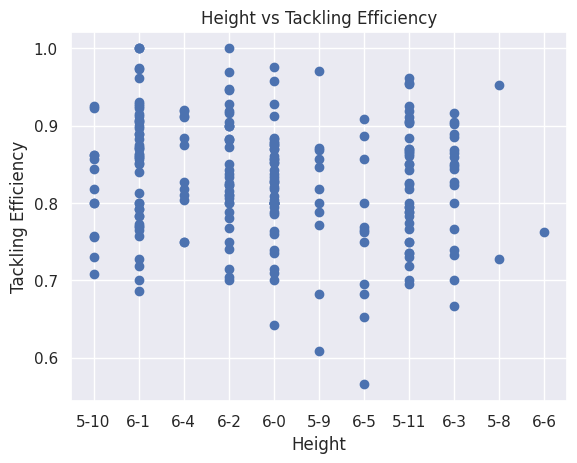

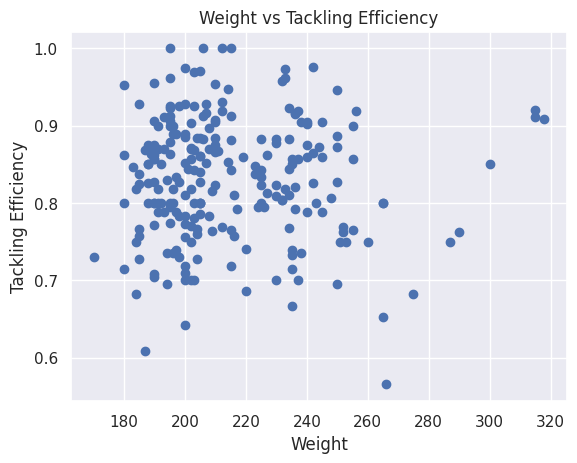

Correlation coefficient between height_in_inches and tackling efficiency: -0.029656328690846168
Correlation coefficient between weight and tackling efficiency: -0.016428102543655683


In [194]:
# Example usage
min_tackles_required = 20
filtered_players = filter_players_by_tackles(player_tackle_stats_with_attributes, min_tackles_required)

# Plotting
plot_attribute_vs_efficiency(filtered_players, 'height')
plot_attribute_vs_efficiency(filtered_players, 'weight')

# Calculating and printing correlations
calculate_and_print_correlations(filtered_players, ['height_in_inches', 'weight'])

RemarK: These numbers suggest that height and weight, by themselves, are not strong predictors of tackling

In [46]:
# Selecting only the numeric columns for the correlation matrix
numeric_data = player_tackle_stats_with_attributes[['height_in_inches', 'weight', 'tackling_efficiency', 'total_forced_fumbles', 'total_tackles', 'total_assists', 'total_missed_tackles']]
numeric_data

,height_in_inches,weight,tackling_efficiency,total_forced_fumbles,total_tackles,total_assists,total_missed_tackles
0,80,300,0.666667,0,8,10,4
1,75,304,0.800000,0,4,4,1
2,74,265,0.857143,0,6,6,1
3,77,275,0.750000,0,3,3,1
4,70,185,0.756757,0,28,23,9
...,...,...,...,...,...,...,...
795,73,285,1.000000,0,1,0,0
796,78,266,1.000000,0,1,0,0
797,74,300,0.000000,0,0,3,0
798,73,185,1.000000,0,2,1,0


In [47]:
# Compute the correlation matrix
corr = numeric_data.corr()
corr

,height_in_inches,weight,tackling_efficiency,total_forced_fumbles,total_tackles,total_assists,total_missed_tackles
height_in_inches,1.000000,0.678034,-0.056146,-0.131187,-0.272086,-0.037439,-0.205068
weight,0.678034,1.000000,-0.054720,-0.156047,-0.323539,0.004998,-0.238941
tackling_efficiency,-0.056146,-0.054720,1.000000,0.082593,0.255359,0.150752,-0.075854
total_forced_fumbles,-0.131187,-0.156047,0.082593,1.000000,0.318834,0.166524,0.232580
total_tackles,-0.272086,-0.323539,0.255359,0.318834,1.000000,0.751917,0.717510
total_assists,-0.037439,0.004998,0.150752,0.166524,0.751917,1.000000,0.598014
total_missed_tackles,-0.205068,-0.238941,-0.075854,0.232580,0.717510,0.598014,1.000000


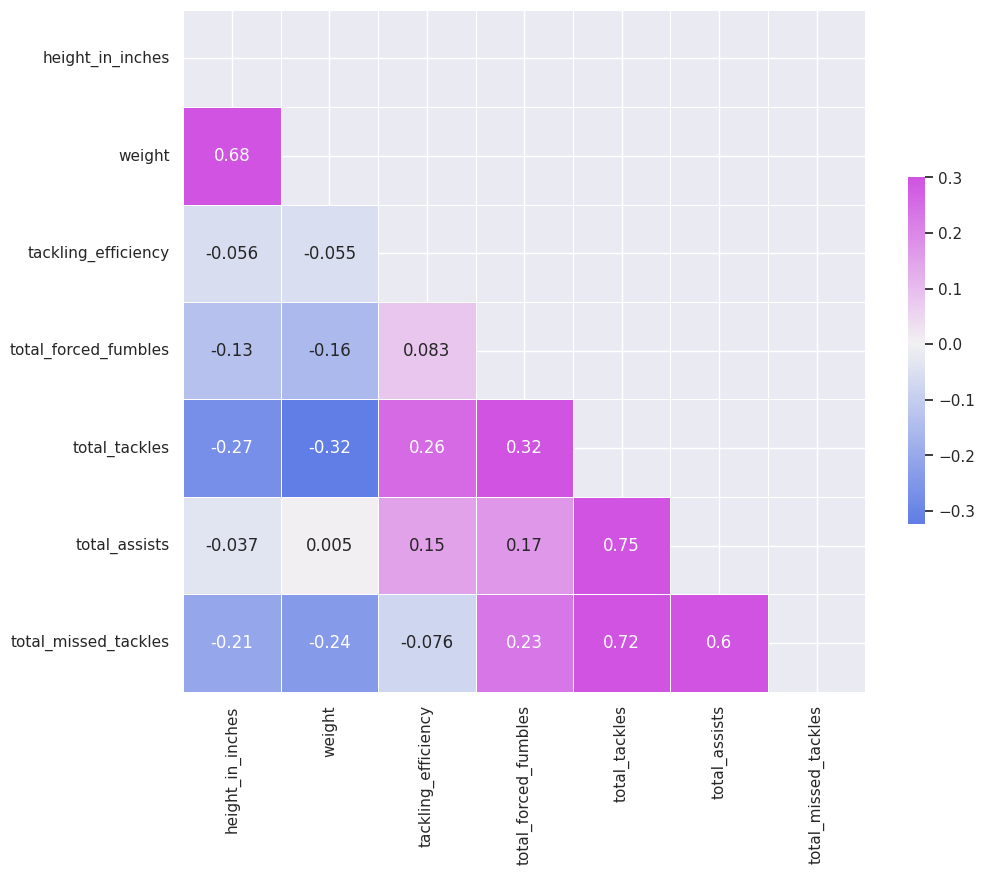

In [48]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize the correlations
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap with violet shades
cmap = sns.diverging_palette(260, 300, s=80, l=55, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

Does Age matter for tackling?

In [49]:
from datetime import datetime

In [50]:
# Process the data so we are doing analysis on players whose birthdate is recorded
players_with_age = players.dropna(subset=['birthDate']).copy()
players_with_age

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1214,53073,6-3,290,1997-02-28,Florida International,DT,Teair Tart
1215,53074,6-3,215,1997-03-21,Indiana,WR,Nick Westbrook-Ikhine
1216,53079,6-1,255,1997-08-20,Toledo,FB,Reggie Gilliam
1217,53085,6-4,300,1996-06-10,Yale,G,Dieter Eiselen


In [51]:
def calculate_exact_age(birthdate, reference_date):
    """
    Calculate the exact age as of a reference date.

    Parameters:
    birthdate (datetime): The birthdate as a datetime object.
    reference_date (datetime): The date on which to calculate the age.

    Returns:
    int: The exact age as of the referen  ce date.
    """
    age = reference_date.year - birthdate.year - ((reference_date.month, reference_date.day) < (birthdate.month, birthdate.day))
    return age


In [52]:
players_with_age['birthDate'] = pd.to_datetime(players['birthDate'])

# Calculate age as of a specific date, in this case, the end of the 2023 season
reference_date = datetime(2023, 1, 8)

players_with_age['age'] = players_with_age['birthDate'].apply(lambda x: calculate_exact_age(x, reference_date))
players_with_age

,nflId,height,weight,birthDate,collegeName,position,displayName,age
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady,45
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters,40
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers,39
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis,38
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan,37
...,...,...,...,...,...,...,...,...
1214,53073,6-3,290,1997-02-28,Florida International,DT,Teair Tart,25
1215,53074,6-3,215,1997-03-21,Indiana,WR,Nick Westbrook-Ikhine,25
1216,53079,6-1,255,1997-08-20,Toledo,FB,Reggie Gilliam,25
1217,53085,6-4,300,1996-06-10,Yale,G,Dieter Eiselen,26


In [53]:
tackle_stats_with_age = player_tackle_stats_with_attributes.merge(players_with_age[['nflId', 'age']], on='nflId', how='left')
tackle_stats_with_age

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height,weight,position,tackling_efficiency,height_in_inches,age
0,33131,Calais Campbell,8,10,0,4,6-8,300,DE,0.666667,80,36.0
1,35449,Tyson Alualu,4,4,0,1,6-3,304,NT,0.800000,75,35.0
2,35452,Brandon Graham,6,6,0,1,6-2,265,DE,0.857143,74,34.0
3,35454,Jason Pierre-Paul,3,3,0,1,6-5,275,DE,0.750000,77,34.0
4,35459,Kareem Jackson,28,23,0,9,5-10,185,SS,0.756757,70,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,55190,Sam Okuayinonu,1,0,0,0,6-1,285,DE,1.000000,73,NaN
796,55200,Ryder Anderson,1,0,0,0,6-6,266,DT,1.000000,78,NaN
797,55239,Prince Emili,0,3,0,0,6-2,300,DT,0.000000,74,NaN
798,55240,Ja'Marcus Ingram,2,1,0,0,6-1,185,CB,1.000000,73,NaN


In [54]:
age_group_tackling_efficiency = tackle_stats_with_age.groupby('age').agg(
    average_tackling_efficiency=('tackling_efficiency', 'mean')
).reset_index()
age_group_tackling_efficiency

,age,average_tackling_efficiency
0,23.0,0.716752
1,24.0,0.784509
2,25.0,0.796667
3,26.0,0.798548
4,27.0,0.781009
5,28.0,0.824982
6,29.0,0.806293
7,30.0,0.787107
8,31.0,0.753008
9,32.0,0.866179


In [55]:
veteran_tackler_names = tackle_stats_with_age.loc[(tackle_stats_with_age["age"] >= 35) & (tackle_stats_with_age["total_tackles"] > 5), ["displayName","age","total_tackles", "total_assists", "total_missed_tackles"]]
veteran_tackler_names

,displayName,age,total_tackles,total_assists,total_missed_tackles
0,Calais Campbell,36.0,8,10,4
5,Devin McCourty,35.0,36,9,3
9,Al Woods,35.0,13,9,1


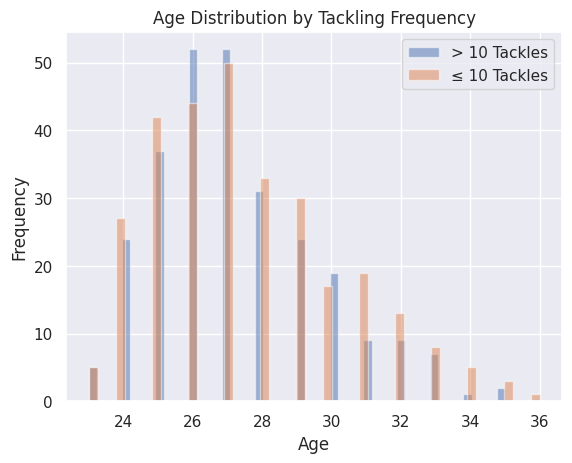

In [56]:
plt.hist(tackle_stats_with_age.loc[tackle_stats_with_age['total_tackles'] > 10, 'age'], bins=50, alpha = 0.5, label='> 10 Tackles')
plt.hist(tackle_stats_with_age.loc[tackle_stats_with_age['total_tackles'] <= 10, 'age'], bins=50, alpha = 0.5, label='≤ 10 Tackles')
# Adding labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Tackling Frequency')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [57]:
age_tackling_corr = tackle_stats_with_age['age'].corr(tackle_stats_with_age['tackling_efficiency'])

print("Pearson correlation coefficient between age and tackling efficiency:", age_tackling_corr)

Pearson correlation coefficient between age and tackling efficiency: 0.020371411844602123


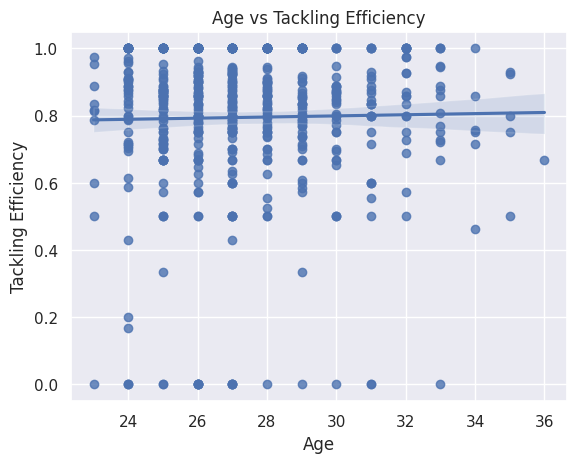

In [58]:
sns.regplot(x='age', y='tackling_efficiency', data=tackle_stats_with_age)
plt.xlabel('Age')
plt.ylabel('Tackling Efficiency')
plt.title('Age vs Tackling Efficiency')
plt.show()

# Tackling Proficiency Analysis

### Individual Player Proficiency

Which players have the highest tackle success rate?
How does tackling proficiency vary across different player positions?

In [59]:
def get_top_tacklers(tackle_stats_df, min_attempts=10, top_n=10):
    """
    Identify the top tacklers based on tackle success rate.

    Parameters:
    tackle_stats_df (DataFrame): DataFrame containing player tackle statistics.
    min_attempts (int): Minimum number of tackle attempts to be considered.
    top_n (int): Number of top players to return.

    Returns:
    DataFrame: Top players sorted by tackle success rate.
    """

    # Filter players with a minimum number of tackle attempts
    filtered_players = tackle_stats_df[tackle_stats_df['total_tackles'] + tackle_stats_df['total_missed_tackles'] >= min_attempts]

    # Sort by tackle success rate and select top players
    top_tacklers = filtered_players.sort_values('tackling_efficiency', ascending=False).head(top_n)

    return top_tacklers

# Usage: if we are looking for top ten players who have attempted at least 20 tackles
top_tacklers_df = get_top_tacklers(player_tackle_stats_with_attributes, min_attempts=20, top_n=10)
top_tacklers_df

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height,weight,position,tackling_efficiency,height_in_inches
415,47877,Jamel Dean,27,8,0,0,6-1,206,CB,1.000000,73
368,46757,Charvarius Ward,25,9,1,0,6-1,195,CB,1.000000,73
527,52515,Akeem Davis-Gaither,21,10,0,0,6-2,215,OLB,1.000000,74
38,38868,Tashaun Gipson,22,5,0,0,6-1,212,FS,1.000000,73
29,38577,Bobby Wagner,40,23,0,1,6-0,242,ILB,0.975610,72
484,52411,Jeff Okudah,38,8,1,1,6-1,200,CB,0.974359,73
30,38588,Lavonte David,37,23,0,1,6-1,233,ILB,0.973684,73
500,52453,Antoine Winfield,33,4,0,1,5-9,205,FS,0.970588,69
550,52624,Kamren Curl,32,13,0,1,6-2,203,SS,0.969697,74
383,47793,Devin Bush,25,18,0,1,5-11,233,ILB,0.961538,71


In [60]:
# Group by position and calculate the average tackle success rate for each position
position_tackle_success = player_tackle_stats_with_attributes.groupby('position')['tackling_efficiency'].mean().sort_values(ascending=False)
position_tackle_success

position
MLB    0.893383
SS     0.841415
FS     0.833114
NT     0.827639
DB     0.823529
CB     0.793652
ILB    0.775063
DT     0.769313
DE     0.749176
OLB    0.729341
Name: tackling_efficiency, dtype: float64

MLB: Middle Linebacker

The middle linebacker is often considered the "quarterback" of the defense, responsible for organizing the defense and making adjustments.

SS: Strong Safety

Strong safeties line up closer to the line of scrimmage than free safeties, often in a position to defend against run plays and short passes.


FS: Free Safety

Free safeties are generally the deepest players on the defense, playing further back from the line of scrimmage, and often responsible for defending against long pass plays.

NT: Nose Tackle

The nose tackle is a defensive lineman who lines up directly across from the football (nose to nose with the center) and is primarily responsible for stopping the run.

DB: Defensive Back

This is a general term for players who defend against pass plays. It includes cornerbacks, safeties, and nickelbacks.

CB: Cornerback

Cornerbacks primarily cover wide receivers and defend against pass plays, often positioned on the edges of the defensive formation.

ILB: Inside Linebacker

Similar to middle linebackers, inside linebackers play behind the defensive line and are responsible for tackling runners, covering receivers, and generally defending against both run and pass plays.

DT: Defensive Tackle

Defensive tackles line up near the center of the line of scrimmage and are primarily responsible for stopping run plays and pressuring the quarterback.

DE: Defensive End

Defensive ends line up at the ends of the defensive line and are tasked with rushing the quarterback and stopping outside run plays.

OLB: Outside Linebacker

Outside linebackers line up on the edges of the formation and have a mix of responsibilities, including rushing the passer, covering receivers, and defending against the run.

###Team-Level Analysis

How does tackling proficiency differ among teams?

In [61]:
team_tackles_df = tackles.merge(plays[['gameId', 'playId', 'defensiveTeam']], on=['gameId', 'playId'])
team_tackles_df

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,defensiveTeam
0,2022090800,101,42816,1,0,0,0,LA
1,2022090800,393,46232,1,0,0,0,BUF
2,2022090800,486,40166,1,0,0,0,BUF
3,2022090800,646,47939,1,0,0,0,LA
4,2022090800,818,40107,1,0,0,0,BUF
...,...,...,...,...,...,...,...,...
17421,2022091101,1616,42368,0,0,0,1,CAR
17422,2022092900,1672,43327,0,0,0,1,MIA
17423,2022092900,1965,52473,0,0,0,1,CIN
17424,2022101611,1052,47996,0,0,0,1,DAL


In [62]:
# Calculate total tackles and missed tackles for each team
team_tackle_performance = team_tackles_df.groupby('defensiveTeam').agg(
    total_tackles=('tackle', 'sum'),
    total_missed_tackles=('pff_missedTackle', 'sum')
).reset_index()

# Sort teams by total tackles in descending order
team_tackle_performance_sorted = team_tackle_performance.sort_values(by='total_tackles', ascending=False)

team_tackle_performance_sorted

,defensiveTeam,total_tackles,total_missed_tackles
27,SEA,360,69
4,CAR,358,79
0,ARI,343,72
1,ATL,343,81
13,IND,342,48
19,MIA,341,78
24,NYJ,330,71
5,CHI,328,75
20,MIN,325,50
14,JAX,324,98


In [63]:
# Calculate tackling efficiency for each team
team_tackle_performance['tackling_efficiency'] = team_tackle_performance['total_tackles'] / (team_tackle_performance['total_tackles'] + team_tackle_performance['total_missed_tackles'])
# Sort teams by tackling efficiency in descending order
team_tackle_performance_sorted = team_tackle_performance.sort_values(by='tackling_efficiency', ascending=False)
team_tackle_performance_sorted

,defensiveTeam,total_tackles,total_missed_tackles,tackling_efficiency
13,IND,342,48,0.876923
21,NE,291,41,0.876506
20,MIN,325,50,0.866667
6,CIN,314,52,0.857923
10,DET,317,53,0.856757
28,SF,243,41,0.855634
16,LA,271,46,0.854890
26,PIT,299,51,0.854286
31,WAS,297,52,0.851003
29,TB,318,56,0.850267


#Tackling Type and Success Tackling Factors

In the dataset, we used PFF's missing tackle stats, here are few things to know about its standards.

Pro Football Focus (PFF) is known for its detailed and advanced analytics in football, including the tracking of missed tackles. PFF's standard for what counts as a missed tackle can be quite specific and is part of their broader approach to detailed player grading and performance analysis. While I don't have the latest details specific to PFF's proprietary methods as of my last update, here's a general understanding of what typically constitutes a missed tackle in football analysis:

Attempted Tackle: The player must have attempted to make a tackle. This usually means they've made a physical effort to bring down the ball carrier, such as reaching, diving, or lunging towards them.

Failed Execution: The player makes contact with the ball carrier (or is in a position to make a play) but fails to bring them down, allowing the ball carrier to break free, gain additional yards, or otherwise continue the play.

Broken Tackles: Often, a missed tackle is synonymous with a broken tackle. If a ball carrier successfully evades or shrugs off a tackle attempt, causing the defender to lose their grip or balance, this is typically counted as a missed tackle.

Contextual Evaluation: The context of the play is important. For example, if a defender is blocked out of a play and has no realistic chance to make a tackle, this might not be counted as a missed tackle.

Angles and Positioning: Missed tackles can also occur due to poor angles or positioning taken by the defender, which results in an ineffective tackle attempt.

PFF's approach likely involves a combination of these factors, evaluated within the context of each specific play. They may also use video analysis and detailed play-by-play grading to assess whether a tackle attempt qualifies as a miss.

In [64]:
def classify_potential_tackle_type(play_description):
    """
    Classify the potential tackle type based on the play description.

    Parameters:
    play_description (str): Description of the play.

    Returns:
    str: 'After Pass' if the play is likely a pass play, 'Other' otherwise.
    """
    if "pass" in play_description.lower():
        return 'After Pass'
    else:
        return 'Other'

in a simplified view, tackles in football can generally be categorized into two main types based on the context in which they occur:

Tackles After a Reception: This type of tackle occurs when a defensive player tackles the ball carrier immediately after they have caught a pass. In this scenario, the focus is on stopping the receiver from gaining additional yards after making the catch.

Tackles After a Run: This type of tackle happens when a ball carrier (who could be a running back, quarterback, or any player running with the ball) is tackled by a defensive player. The tackle could occur shortly after the handoff or snap in the case of a direct run or after the ball carrier has moved downfield.

Open Field Tackles: These tackles happen when a defensive player tackles the ball carrier in open space, which can be challenging due to the need to close the distance and effectively bring down the ball carrier.

Tackles at or Behind the Line of Scrimmage: These are typically made on running plays or quarterback sacks and are crucial for stopping the offensive play early.

Gang Tackles: Situations where multiple defensive players contribute to bringing down the ball carrier.

Special Teams Tackles: These occur during kickoffs, punts, and other special teams plays.

In practice, the context of a tackle can be more complex, involving a mix of strategic, positional, and situational factors. Understanding the different types of tackles and their contexts is important for analyzing defensive strategies and player performance in football.

In [65]:
plays_with_play_type = plays.copy()

In [66]:
# Apply the function to the 'playDescription' column in the plays DataFrame
plays_with_play_type['playType'] = plays['playDescription'].apply(classify_potential_tackle_type)
plays_with_play_type

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,playType
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,After Pass
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,Other
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN,After Pass
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,Other
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,2022100204,123,43293,Ezekiel Elliott,(13:31) E.Elliott right tackle to WAS 38 for 1...,1,1,10,DAL,WAS,...,0.361400,-0.011542,0.011542,3.642571,-0.504018,NaN,NaN,NaN,NaN,Other
12482,2022091200,3467,46189,Will Dissly,(6:08) G.Smith pass short right to W.Dissly to...,4,1,10,SEA,DEN,...,0.384759,-0.025458,0.025458,1.434580,-0.444642,NaN,NaN,NaN,NaN,After Pass
12483,2022101605,3371,44860,Joe Mixon,(9:35) (Shotgun) J.Mixon left end to CIN 47 fo...,4,1,10,CIN,NO,...,0.332946,-0.005164,0.005164,2.115356,0.203819,NaN,NaN,NaN,NaN,Other
12484,2022100207,2777,52449,Jonathan Taylor,(2:02) (Shotgun) J.Taylor up the middle to TEN...,3,1,10,IND,TEN,...,0.589389,-0.046648,0.046648,3.946232,-0.976039,NaN,NaN,NaN,NaN,Other


In [67]:
# Merge the 'playType' into your tackling stats DataFrame
tackles_with_play_type = tackles.merge(plays_with_play_type[['gameId', 'playId', 'playType', 'playDescription']], on=['gameId', 'playId'])
tackles_with_play_type

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,playType,playDescription
0,2022090800,101,42816,1,0,0,0,Other,(13:54) D.Singletary right end to BUF 45 for 7...
1,2022090800,393,46232,1,0,0,0,Other,(7:45) (Shotgun) D.Henderson right guard to LA...
2,2022090800,486,40166,1,0,0,0,After Pass,"(5:53) (No Huddle, Shotgun) M.Stafford pass sh..."
3,2022090800,646,47939,1,0,0,0,After Pass,(1:53) J.Allen pass short left to D.Knox to LA...
4,2022090800,818,40107,1,0,0,0,After Pass,(15:00) (Shotgun) M.Stafford pass short left t...
...,...,...,...,...,...,...,...,...,...
17421,2022091101,1616,42368,0,0,0,1,Other,"(4:52) K.Hunt up the middle for 24 yards, TOUC..."
17422,2022092900,1672,43327,0,0,0,1,After Pass,(2:58) (Shotgun) J.Burrow pass deep left to T....
17423,2022092900,1965,52473,0,0,0,1,After Pass,(:15) T.Bridgewater pass short middle to C.Edm...
17424,2022101611,1052,47996,0,0,0,1,After Pass,(10:47) (Shotgun) J.Hurts pass short right to ...


In [68]:
def view_play_descriptions(df, play_type, top=True, num_descriptions=5):
    """
    Display the top play descriptions for a specified play type.

    Parameters:
    df (DataFrame): The DataFrame containing play data.
    play_type (str): The type of play to filter by.
    top (bool): Whether to show top or bot play
    num_descriptions (int): The number of top descriptions to display.
    """
    # Ensure the display setting allows for full string content
    pd.set_option('display.max_colwidth', None)

    # Filter rows for the specified play type
    filtered_plays = df.loc[df['playType'] == play_type, 'playDescription']

    # Display the top few descriptions
    if top:
      print(filtered_plays.head(num_descriptions))
    else:
      print(filtered_plays.tail(num_descriptions))

    # Reset the display option for column width
    pd.reset_option('display.max_colwidth')

In [69]:
view_play_descriptions(tackles_with_play_type, 'Other', True, 20)

0                                     (13:54) D.Singletary right end to BUF 45 for 7 yards (T.Hill).
1                           (7:45) (Shotgun) D.Henderson right guard to LA 43 for 1 yard (T.Settle).
7                         (1:20) (No Huddle) C.Akers up the middle to BUF 31 for no gain (M.Milano).
10            (8:23) (No Huddle, Shotgun) D.Henderson up the middle to LA 34 for 1 yard (D.Jackson).
11            (4:57) (No Huddle, Shotgun) D.Henderson left tackle to LA 26 for -1 yards (T.Johnson).
13                 (9:32) (Shotgun) C.Patterson left tackle to ATL 32 for 5 yards (M.Maye, J.Evans).
14                 (9:32) (Shotgun) C.Patterson left tackle to ATL 32 for 5 yards (M.Maye, J.Evans).
16                            (13:10) (Shotgun) T.Hill right tackle to ATL 49 for 9 yards (R.Grant).
17                 (8:09) (No Huddle, Shotgun) C.Patterson right end to ATL 46 for 1 yard (D.Davis).
18                              (6:08) (Shotgun) T.Hill right end to NO 44 for 4 yards (A.O

In [70]:
view_play_descriptions(tackles_with_play_type, 'Other', False, 20)

17392                                                      (6:26) (Shotgun) E.Benjamin up the middle for 5 yards, TOUCHDOWN.
17394                                                                    (15:00) T.Etienne right end for 5 yards, TOUCHDOWN.
17395                                                      (5:41) (No Huddle) S.Barkley right guard for 36 yards, TOUCHDOWN.
17396                                                      (5:41) (No Huddle) S.Barkley right guard for 36 yards, TOUCHDOWN.
17397                                                        (13:02) (Shotgun) A.Ekeler right guard for 10 yards, TOUCHDOWN.
17398                                                                    (10:00) D.Pierce right end for 75 yards, TOUCHDOWN.
17400     (15:00) (Shotgun) N.Harris left tackle for 5 yards, TOUCHDOWN. Penalty on CLV-D.Ward, Defensive Offside, declined.
17401     (15:00) (Shotgun) N.Harris left tackle for 5 yards, TOUCHDOWN. Penalty on CLV-D.Ward, Defensive Offside, declined.


In [71]:
view_play_descriptions(tackles_with_play_type, 'After Pass', 20)

2                                                       (5:53) (No Huddle, Shotgun) M.Stafford pass short right to C.Kupp to BUF 45 for 6 yards (J.Poyer).
3    (1:53) J.Allen pass short left to D.Knox to LA 47 for 5 yards (J.Hollins). PENALTY on LA-J.Hollins, Horse Collar Tackle, 15 yards, enforced at LA 47.
4                                          (15:00) (Shotgun) M.Stafford pass short left to D.Henderson to LA 31 for 1 yard (M.Hyde, C.Benford) [E.Oliver].
5                                          (15:00) (Shotgun) M.Stafford pass short left to D.Henderson to LA 31 for 1 yard (M.Hyde, C.Benford) [E.Oliver].
6                                                                  (6:49) M.Stafford pass short left to C.Kupp pushed ob at BUF 30 for 6 yards (M.Milano).
Name: playDescription, dtype: object


In [190]:
# Group by 'playType' and calculate tackling efficiency
tackle_efficiency_by_play_type = tackles_with_play_type.groupby('playType').agg(
    total_attempts=('tackle', 'count'),
    successful_tackles=('tackle', 'sum')
).reset_index()

tackle_efficiency_by_play_type['tackling_efficiency'] = tackle_efficiency_by_play_type['successful_tackles'] / tackle_efficiency_by_play_type['total_attempts']
tackle_efficiency_by_play_type

,playType,total_attempts,successful_tackles,tackling_efficiency
0,After Pass,7035,4798,0.682018
1,Other,10391,5121,0.492830


How does tackling effectiveness change over the course of a game?

In [73]:
tackles_with_quarters = tackles.merge(plays[['gameId', 'playId', 'quarter']], on=['gameId', 'playId'])
tackles_with_quarters

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,quarter
0,2022090800,101,42816,1,0,0,0,1
1,2022090800,393,46232,1,0,0,0,1
2,2022090800,486,40166,1,0,0,0,1
3,2022090800,646,47939,1,0,0,0,1
4,2022090800,818,40107,1,0,0,0,2
...,...,...,...,...,...,...,...,...
17421,2022091101,1616,42368,0,0,0,1,2
17422,2022092900,1672,43327,0,0,0,1,2
17423,2022092900,1965,52473,0,0,0,1,2
17424,2022101611,1052,47996,0,0,0,1,2


In [74]:
# Group by game quarter and calculate tackling efficiency
tackle_efficiency_by_quarter = tackles_with_quarters.groupby('quarter').agg(
    total_attempts=('tackle', 'count'),
    successful_tackles=('tackle', 'sum')
).reset_index()
tackle_efficiency_by_quarter['tackling_efficiency'] = tackle_efficiency_by_quarter['successful_tackles'] / tackle_efficiency_by_quarter['total_attempts']
tackle_efficiency_by_quarter

,quarter,total_attempts,successful_tackles,tackling_efficiency
0,1,4056,2375,0.585552
1,2,4557,2572,0.564406
2,3,4115,2268,0.551154
3,4,4565,2618,0.573494
4,5,133,86,0.646617


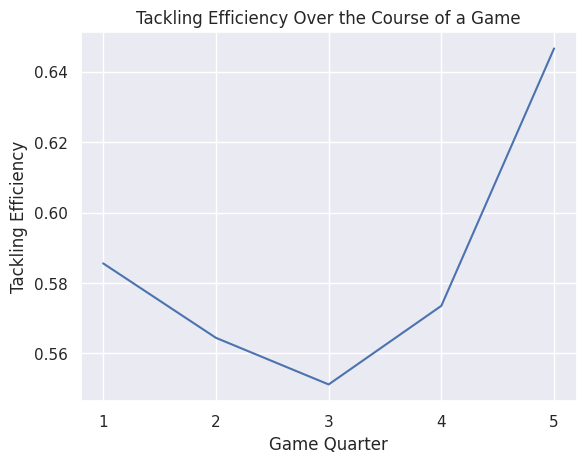

In [75]:
plt.plot(tackle_efficiency_by_quarter['quarter'], tackle_efficiency_by_quarter['tackling_efficiency'])
plt.xlabel('Game Quarter')
plt.ylabel('Tackling Efficiency')
plt.title('Tackling Efficiency Over the Course of a Game')
plt.xticks(tackle_efficiency_by_quarter['quarter'])  # Ensure quarters are correctly labeled
plt.show()

#Basic Tracking Analysis

At what speed are players getting tackled? How do player speeds and accelerations correlate with tackling success?

In [76]:
all_tracking_data = pd.concat(weekly_tracking)
all_tracking_data

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150018,2022110700,3787,NaN,football,40,2022-11-07 23:06:49.200000,NaN,football,right,26.219999,19.680000,1.37,2.58,0.15,NaN,NaN,tackle
1150019,2022110700,3787,NaN,football,41,2022-11-07 23:06:49.299999,NaN,football,right,26.320000,19.610001,1.07,2.74,0.12,NaN,NaN,NaN
1150020,2022110700,3787,NaN,football,42,2022-11-07 23:06:49.400000,NaN,football,right,26.389999,19.559999,0.80,2.49,0.09,NaN,NaN,NaN
1150021,2022110700,3787,NaN,football,43,2022-11-07 23:06:49.500000,NaN,football,right,26.450001,19.520000,0.57,2.38,0.07,NaN,NaN,NaN


Average Speed During Tackles: 2.4821220401499806 yards/second


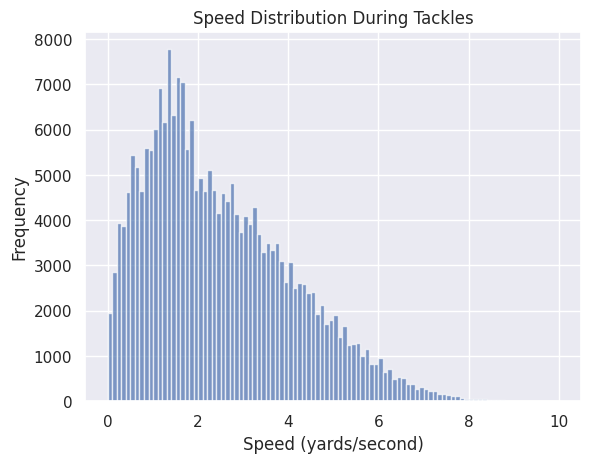

In [77]:
# Average speed of players during tackles
tackle_speeds = all_tracking_data[all_tracking_data['event'] == 'tackle']['s']
average_tackle_speed = tackle_speeds.mean()

print(f"Average Speed During Tackles: {average_tackle_speed} yards/second")

# Plotting speeds during tackles
plt.hist(tackle_speeds, bins=100, range=(0, 10), alpha=0.7)
plt.xlabel('Speed (yards/second)')
plt.ylabel('Frequency')
plt.title('Speed Distribution During Tackles')
plt.show()

In [78]:
combined_data = pd.merge(all_tracking_data, tackles, on=['gameId', 'playId', 'nflId'])
tackle_data = combined_data[combined_data['event'] == 'tackle']
tackle_data

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,s,a,dis,o,dir,event,tackle,assist,forcedFumble,pff_missedTackle
17,2022090800,56,43294.0,Jalen Ramsey,18,2022-09-08 20:24:06.900000,5.0,LA,left,78.66,...,1.10,3.17,0.12,116.19,127.74,tackle,1,0,0,0
47,2022090800,80,53532.0,Ernest Jones,26,2022-09-08 20:24:38.200000,53.0,LA,left,72.96,...,5.62,1.95,0.56,336.48,327.47,tackle,1,0,0,0
96,2022090800,101,42816.0,Troy Hill,45,2022-09-08 20:25:12.599999,2.0,LA,left,69.08,...,1.80,4.97,0.20,210.96,198.30,tackle,1,0,0,0
129,2022090800,122,38577.0,Bobby Wagner,29,2022-09-08 20:25:53.799999,45.0,LA,left,60.31,...,3.19,2.90,0.33,245.75,289.12,tackle,1,0,0,0
185,2022090800,146,38577.0,Bobby Wagner,52,2022-09-08 20:26:34.500000,45.0,LA,left,57.05,...,2.16,2.57,0.20,134.16,202.39,tackle,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803934,2022110700,3658,44871.0,Tanoh Kpassagnon,55,2022-11-07 22:59:53.200000,90.0,NO,left,64.04,...,1.95,2.29,0.21,282.62,196.01,tackle,1,0,0,0
804010,2022110700,3686,48027.0,Kaden Elliss,72,2022-11-07 23:00:38.299999,55.0,NO,left,57.78,...,0.99,1.11,0.10,317.81,112.45,tackle,1,0,0,0
804068,2022110700,3707,48027.0,Kaden Elliss,54,2022-11-07 23:03:50.799999,55.0,NO,left,57.15,...,1.02,2.09,0.07,211.74,251.42,tackle,1,0,0,0
804110,2022110700,3740,48537.0,Carl Granderson,38,2022-11-07 23:04:34.900000,96.0,NO,left,63.01,...,5.89,4.37,0.61,211.43,183.73,tackle,1,0,0,0


#Development of New Metrics

Metric: Evaluate the importance of the tackle (yard saved due to this tackle)

In [79]:
class nflBigData:
    """
    A class for analyzing NFL Big Data Bowl datasets.

    This class includes methods for calculating various metrics related to player movements and interactions
    during NFL plays, using data from multiple sources, including tracking data, play information, and player
    attributes.

    Attributes:
        PLAYIDS (list): A list of strings used as primary keys to index the datasets.
        tackles (DataFrame): DataFrame containing tackle data.
        plays (DataFrame): DataFrame containing play data.
        players (DataFrame): DataFrame containing player data.
        weekly_tracking (list): A list of DataFrames containing weekly tracking data.
        carrier_list (list): A list to store DataFrames merged with ball carrier information.
        defender_list (list): A list to store DataFrames merged with defender information.
    """

    PLAYIDS = ["gameId", "playId"]  # Combination of indices used for merging datasets.

    # Reading CSV files containing tackles, plays, and player data.
    tackles = pd.read_csv("/content/drive/MyDrive/DSGA1007/data/tackles.csv")
    plays = pd.read_csv("/content/drive/MyDrive/DSGA1007/data/plays.csv")
    players = pd.read_csv("/content/drive/MyDrive/DSGA1007/data/players.csv")

    # Reading weekly tracking data for weeks 1 to 9.
    weekly_tracking = [pd.read_csv(f"/content/drive/MyDrive/DSGA1007/data/tracking_week_{i}.csv") for i in range(1, 10)]

    def __init__(self):
        # Initialize instance variables with class variables.
        self.PLAYIDS = nflBigData.PLAYIDS
        self.plays = nflBigData.plays
        self.players = nflBigData.players
        self.tackles = nflBigData.tackles
        self.trackings = nflBigData.weekly_tracking
        self.carrier_list = []  # Initialize empty list for merged DataFrames (ball carriers).
        self.defender_list = []  # Initialize empty list for merged DataFrames (defenders).

    def calcaulte_downfield_speed(self, df):
        """
        Calculate downfield speed for players in a DataFrame.

        Downfield speed is calculated based on the player's direction and speed in the play's context.
        The function modifies the input DataFrame by adding a new column 's_downfield'.

        Args:
            df (DataFrame): The DataFrame containing player tracking data.

        Returns:
            DataFrame: The modified DataFrame with the downfield speed calculated.
        """
        # Calculate angle to downfield based on play direction and player direction.
        angle_to_downfield = np.pi * np.where(
            df.playDirection == "right",
            df.dir - 90,
            df.dir - 270
        ) / 180

        # Calculate downfield speed and add it as a new column.
        df["s_downfield"] = df.s * np.cos(angle_to_downfield)

        return df

    def calcaulte_downfield_acc(self, df):
        """
        Calculate downfield acceleration for players in a DataFrame.

        This function is similar to calcaulte_downfield_speed but calculates the downfield acceleration.
        The function modifies the input DataFrame by adding a new column 'a_downfield'.

        Args:
            df (DataFrame): The DataFrame containing player tracking data.

        Returns:
            DataFrame: The modified DataFrame with the downfield acceleration calculated.
        """
        # Similar calculation as in calcaulte_downfield_speed, but for acceleration.
        angle_to_downfield = np.pi * np.where(
            df.playDirection == "right",
            df.dir - 90,
            df.dir - 270
        ) / 180

        # Calculate downfield acceleration and add it as a new column.
        df["a_downfield"] = df.a * np.cos(angle_to_downfield)

        return df

    def calcaulte_dist_to_carrier(self, df):
        """
        Calculate the distance of players to the ball carrier in a DataFrame.

        This function adds a column 'dist_to_carrier' representing the Euclidean distance
        from each player to the ball carrier.

        Args:
            df (DataFrame): The DataFrame containing merged tracking data of players and ball carriers.

        Returns:
            DataFrame: The modified DataFrame with the distance to carrier calculated.
        """
        # Fill missing defender IDs with 0 and convert to integer.
        df.nflId_defender = df.nflId_defender.fillna(0).astype("int")

        # Calculate Euclidean distance from defenders to the ball carrier.
        df["dist_to_carrier"] = np.sqrt(
            np.power(df.x_carrier - df.x_defender, 2) + np.power(df.y_carrier - df.y_defender, 2)
        )

        return df

    def calculate_yards_forward(self, df):
        """
        Calculate yards gained forward by the ball carrier.

        The function computes the horizontal distance (yards) covered by the ball carrier in the direction of play.

        Args:
            df (DataFrame): The DataFrame containing ball carrier tracking data with final positions.

        Returns:
            DataFrame: The modified DataFrame with the yards forward calculated.
        """
        df["yards_forward"] = np.where(
            df["playDirection"] == "right",
            df["x_final"] - df["x_carrier"],
            df["x_carrier"] - df["x_final"]
        )

        return df

    def construct_ball_carrier_view(self, tracking_df):
        """
        Constructs a view focusing on ball carriers from tracking data.

        This method merges the provided tracking DataFrame with play and ball carrier information
        to create a comprehensive view of the ball carriers' movements and actions during plays.
        It calculates downfield speed and acceleration for the ball carriers and appends the result
        to the carrier list attribute.

        Args:
            tracking_df (DataFrame): The DataFrame containing tracking data.

        Returns:
            None: The method updates the carrier_list attribute of the class.
        """
        # Merging tracking data with play and ball carrier IDs
        ball_carriers = tracking_df.merge(
            self.plays[self.PLAYIDS + ["ballCarrierId"]],
            left_on=self.PLAYIDS + ["nflId"],
            right_on=self.PLAYIDS + ["ballCarrierId"]
        )

        # Determining end of play for each ball carrier
        play_end = ball_carriers.dropna(subset="event").drop_duplicates(
            subset=self.PLAYIDS, keep="last"
        )[self.PLAYIDS + ["frameId", "event", "x"]].rename(
            columns=dict(frameId="endFrameId", event="endEvent", x="x_final")
        )

        # Identifying when ball carriers received the ball
        carry_start = ball_carriers[
            ball_carriers.event.isin({"run", "handoff", "pass_outcome_caught", "snap_direct"})
        ].drop_duplicates(
            subset=self.PLAYIDS, keep="last"
        )[self.PLAYIDS + ["frameId", "event"]].rename(
            columns=dict(frameId="startFrameId", event="receiptEvent")
        )
        carry_window = carry_start.merge(play_end, on=self.PLAYIDS)

        # Filtering for frames where the ball carrier has the ball
        ball_carriers = ball_carriers.merge(
            carry_window,
            on=self.PLAYIDS
        )

        # Calculating downfield speed and acceleration for ball carriers
        ball_carriers = self.calcaulte_downfield_speed(ball_carriers)
        ball_carriers = self.calcaulte_downfield_acc(ball_carriers)

        # Appending processed data to the carrier list
        self.carrier_list.append(
            ball_carriers[
                ball_carriers.frameId.between(ball_carriers.startFrameId, ball_carriers.endFrameId)
            ].reset_index(drop=True).astype({"nflId": "int", "jerseyNumber": "int"})
        )

    def construct_defender_view(self, tracking_df, nearby_radius=5):
        """
        Constructs a view focusing on defenders from tracking data.

        This method merges the latest ball carrier view with the provided tracking DataFrame
        to create a comprehensive view of defenders' positions and actions relative to the ball carrier.
        It calculates the distance of each defender to the ball carrier and identifies nearby defenders
        and teammates (blockers) within a specified radius.

        Args:
            tracking_df (DataFrame): The DataFrame containing tracking data.
            nearby_radius (int, optional): The radius within which to consider defenders as 'nearby'. Defaults to 5 yards.

        Returns:
            None: The method updates the defender_list attribute of the class.
        """
        # Define merging keys for combining datasets
        mergeby = self.PLAYIDS + ["frameId"]

        # Merging tracking data with the latest ball carrier view
        others = self.carrier_list[-1].merge(
            tracking_df.drop(columns=["playDirection", "time", "event"]),
            on=mergeby, suffixes=("_carrier", "_defender")
        )

        # Calculating distances from each player to the ball carrier
        others = self.calcaulte_dist_to_carrier(others)

        # Identifying supporting players (same team as ball carrier)
        support = others[
            (others.club_defender == others.club_carrier) & (others.nflId_defender != others.nflId_carrier)
        ]
        # Counting nearby supporting players (blockers)
        support_nearby = support[
            support.dist_to_carrier < nearby_radius
        ].groupby(mergeby).nflId_defender.nunique().rename("blockers_nearby")
        others = others.merge(
            support_nearby,
            left_on=mergeby,
            right_index=True,
            how="left"
        )
        others.blockers_nearby = others.blockers_nearby.fillna(0).astype("int")

        # Filtering for defenders (opposing team players)
        defenders = others[
            (others.club_defender != others.club_carrier) & (others.club_defender != "football")
        ].reset_index(drop=True).astype({"jerseyNumber_defender": "int"})
        # Counting nearby defenders
        defenders_nearby = defenders[
            defenders.dist_to_carrier < nearby_radius
        ].groupby(mergeby).nflId_defender.nunique().rename("defenders_nearby")
        defenders = defenders.merge(
            defenders_nearby,
            left_on=mergeby,
            right_index=True,
            how="left"
        )
        defenders.defenders_nearby = defenders.defenders_nearby.fillna(0).astype("int")

        # Appending processed data to the defender list
        self.defender_list.append(defenders)

    def add_physical_characteristics(self):
        """
        Adds physical characteristics (height and weight) to the players in the defender list.

        This method extracts and converts the height information from the players DataFrame,
        calculates the height in meters, and then merges these physical characteristics with
        the data in the defender list.

        Returns:
            None: The method updates the defender_list attribute of the class.
        """
        # Splitting height data and converting it to meters
        height = self.players.height.str.split("-")
        self.players["height_m"] = (
            height.str[0].astype("int") + height.str[1].astype("int") / 12
        ) * 0.3048

        # Creating a DataFrame with player's physical characteristics
        players_df = self.players.set_index("nflId")[["weight", "position", "height_m"]]

        # Merging physical characteristics with the latest defender data
        tmp = self.defender_list[-1].merge(
            players_df,
            left_on="nflId_carrier",
            right_index=True
        )
        tmp = tmp.merge(
            players_df,
            left_on="nflId_defender",
            right_index=True,
            suffixes=("_carrier", "_defender")
        )

        # Updating the latest defender data with merged information
        self.defender_list[-1] = tmp

    def add_labels(self):
        """
        Adds tackling data as labels to the defender list.

        This method merges the tackling data from the tackles DataFrame with the
        latest data in the defender list to provide labels for each defender's actions.

        Returns:
            None: The method updates the defender_list attribute of the class.
        """
        # Merging the latest defender data with tackle information
        tmp = self.defender_list[-1].merge(
            self.tackles,
            left_on=self.PLAYIDS + ["nflId_defender"],
            right_on=self.PLAYIDS + ["nflId"],
            how="left"
        ).drop(columns="nflId")

        # Filling missing tackle data with zeros and converting to integer
        map_cols = [c for c in self.tackles if c != "nflId"]
        tmp[map_cols] = tmp[map_cols].fillna(0).astype("int")

        # Updating the latest defender data with merged information
        self.defender_list[-1] = tmp

    def pipeline(self):
        """
        Executes the entire data processing pipeline on tracking data.

        This method sequentially processes each DataFrame in the tracking data list through
        various analysis steps, including constructing views for ball carriers and defenders,
        adding physical characteristics, and labeling actions. It compiles and returns the final
        DataFrame containing processed and merged data.

        Returns:
            DataFrame: The final DataFrame containing processed data from all steps.
        """
        # Sequentially processing each tracking DataFrame
        for _df in tqdm(self.trackings):
            self.construct_ball_carrier_view(_df)
            self.construct_defender_view(_df)
            self.add_physical_characteristics()
            self.add_labels()

        # Compiling and sorting the final data
        carrierDefender_df = pd.concat(self.defender_list).reset_index(drop=True)
        carrierDefender_df = carrierDefender_df.sort_values(self.PLAYIDS + ["frameId", "nflId_defender"]).reset_index(drop=True)
        carrierDefender_df = self.calculate_yards_forward(carrierDefender_df)

        return carrierDefender_df

In [80]:
nfl = nflBigData()
carrierDefender_df = nfl.pipeline()

100%|██████████| 9/9 [00:38<00:00,  4.25s/it]


In [81]:
def calculate_avg_downfield_speed(df):
    """
    Calculates the average downfield speed for tackled plays.

    Args:
        df (DataFrame): The DataFrame containing carrier and defender data.

    Returns:
        DataFrame: The average downfield speed per game and play.
    """
    return pd.DataFrame(df[df["tackle"] == 1].groupby(
        by=["gameId", "playId"]
    )["s_downfield"].mean()).rename(columns={"s_downfield": "avg_s_downfield"})

def calculate_avg_downfield_acc(df):
    """
    Calculates the average downfield acceleration for tackled plays.

    Args:
        df (DataFrame): The DataFrame containing carrier and defender data.

    Returns:
        DataFrame: The average downfield acceleration per game and play.
    """
    return pd.DataFrame(df[df["tackle"] == 1].groupby(
        by=["gameId", "playId"]
    )["a_downfield"].mean()).rename(columns={"a_downfield": "avg_a_downfield"})


def calculate_total_frames(df):
    """
    Calculates the total number of frames for tackled plays.

    Args:
        df (DataFrame): The DataFrame containing carrier and defender data.

    Returns:
        DataFrame: The total number of frames per game and play.
    """
    return pd.DataFrame(df[df["tackle"] == 1].groupby(
        by=["gameId", "playId"]
    )["frameId"].count()).rename(columns={"frameId": "total_frame"})

def prepare_yards_forward_data(df, avg_s_downfield, avg_a_downfield, sum_t):
    """
    Prepares the DataFrame for yards forward analysis by merging with average speed,
    acceleration data, and sum of frames.

    Args:
        df (DataFrame): The DataFrame containing carrier and defender data.
        avg_s_downfield (DataFrame): The average downfield speed per game and play.
        avg_a_downfield (DataFrame): The average downfield acceleration per game and play.
        sum_t (DataFrame): The total number of frames per game and play.

    Returns:
        DataFrame: The merged DataFrame ready for yards forward analysis.
    """
    min_frameId_yf = pd.DataFrame(df.groupby(
        by=["gameId", "playId"]
    )["frameId"].min()).merge(df, on=["gameId", "playId", "frameId"])
    min_frameId_yf = min_frameId_yf[min_frameId_yf["tackle"] == 1].reset_index(drop=True)
    min_frameId_yf = avg_s_downfield.merge(min_frameId_yf, on=["gameId", "playId"])
    min_frameId_yf = avg_a_downfield.merge(min_frameId_yf, on=["gameId", "playId"])
    return sum_t.merge(min_frameId_yf, on=["gameId", "playId"])

In [82]:
# Calculate average downfield speed, average downfield acceleration, and average frame lasted in a play that contains tackle
avg_s_downfield = calculate_avg_downfield_speed(carrierDefender_df)

avg_a_downfield = calculate_avg_downfield_acc(carrierDefender_df)

sum_t = calculate_total_frames(carrierDefender_df)

min_frameId_yf = prepare_yards_forward_data(carrierDefender_df, avg_s_downfield, avg_a_downfield, sum_t)

In [83]:
min_frameId_yf.head(10)

,gameId,playId,total_frame,avg_a_downfield,avg_s_downfield,frameId,nflId_carrier,displayName_carrier,time,jerseyNumber_carrier,...,position_carrier,height_m_carrier,weight_defender,position_defender,height_m_defender,tackle,assist,forcedFumble,pff_missedTackle,yards_forward
0,2022090800,56,13,0.590546,0.497226,6,42489,Stefon Diggs,2022-09-08 20:24:05.700000,14,...,WR,1.8288,208,CB,1.8542,1,0,0,0,0.52
1,2022090800,80,21,1.299173,4.359896,6,46076,Josh Allen,2022-09-08 20:24:36.200000,17,...,QB,1.9558,230,ILB,1.8796,1,0,0,0,8.75
2,2022090800,101,27,2.721991,4.715122,19,47857,Devin Singletary,2022-09-08 20:25:10.000000,26,...,RB,1.7018,184,CB,1.8034,1,0,0,0,12.47
3,2022090800,122,24,1.600130,3.451179,6,47857,Devin Singletary,2022-09-08 20:25:51.500000,26,...,RB,1.7018,242,ILB,1.8288,1,0,0,0,8.00
4,2022090800,167,13,1.416479,4.989062,6,42489,Stefon Diggs,2022-09-08 20:27:10.900000,14,...,WR,1.8288,240,DE,1.9558,1,0,0,0,6.07
5,2022090800,191,30,1.292680,2.723166,18,52494,Zack Moss,2022-09-08 20:27:43.799999,20,...,RB,1.7780,252,OLB,1.9558,1,0,0,0,8.00
6,2022090800,212,7,1.850387,3.866659,6,52494,Zack Moss,2022-09-08 20:28:26.200000,20,...,RB,1.7780,242,ILB,1.8288,1,0,0,0,2.38
7,2022090800,299,31,2.773121,3.387088,19,47853,Darrell Henderson,2022-09-08 20:33:32.299999,27,...,RB,1.7272,253,DE,2.0066,1,0,0,0,10.69
8,2022090800,343,19,2.463813,3.672760,17,47853,Darrell Henderson,2022-09-08 20:34:33.900000,27,...,RB,1.7272,250,ILB,1.9558,1,0,0,0,6.66
9,2022090800,364,3,1.073896,4.302550,6,44881,Cooper Kupp,2022-09-08 20:35:17.900000,10,...,WR,1.8796,191,SS,1.8288,1,0,0,0,0.86


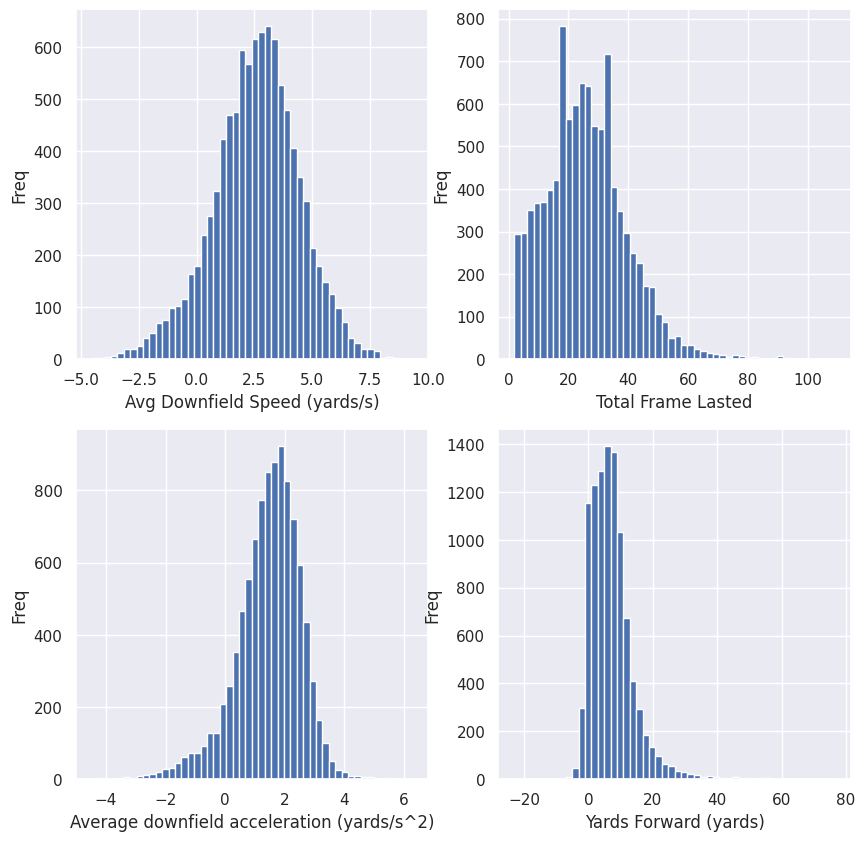

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram for avg_s_downfield
axs[0, 0].hist(min_frameId_yf["avg_s_downfield"], bins=50)
axs[0, 0].set_xlabel("Avg Downfield Speed (yards/s)")
axs[0, 0].set_ylabel("Freq")

# Histogram for total_frame
axs[0, 1].hist(min_frameId_yf["total_frame"], bins=50)
axs[0, 1].set_xlabel("Total Frame Lasted")
axs[0, 1].set_ylabel("Freq")

# Histogram for avg_a_downfield
axs[1, 0].hist(min_frameId_yf["avg_a_downfield"], bins=50)
axs[1, 0].set_xlabel("Average downfield acceleration (yards/s^2)")
axs[1, 0].set_ylabel("Freq")

# Histogram for yards_forward
axs[1, 1].hist(min_frameId_yf["yards_forward"], bins=50)
axs[1, 1].set_xlabel("Yards Forward (yards)")
axs[1, 1].set_ylabel("Freq")

plt.show()

                          avg_s_downfield_plus_acc  yards_forward
avg_s_downfield_plus_acc                  1.000000       0.829891
yards_forward                             0.829891       1.000000


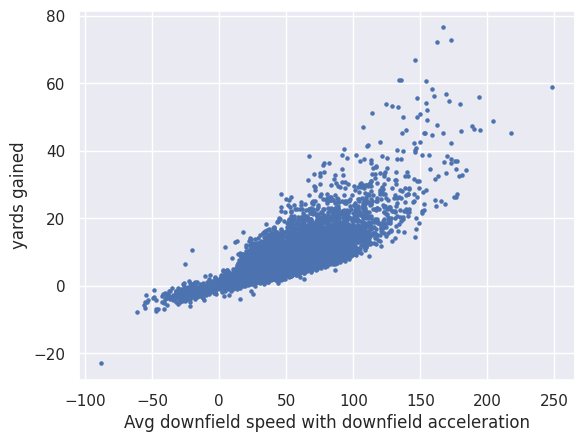

In [85]:
# Calculate a new metric 'avg_s_downfield_plus_acc' by adding the product of 'total_frame' and 'avg_a_downfield' to 'avg_s_downfield'
min_frameId_yf["avg_s_downfield_plus_acc"] = min_frameId_yf["avg_s_downfield"] + \
                                             min_frameId_yf["total_frame"] * min_frameId_yf["avg_a_downfield"]

# Print the correlation matrix between 'avg_s_downfield_plus_acc' and 'yards_forward'
print(min_frameId_yf[["avg_s_downfield_plus_acc", "yards_forward"]].corr())

# Plot a scatter plot to visualize the relationship between the combined speed and acceleration and the yards gained ('yards_forward')
plt.scatter(min_frameId_yf["avg_s_downfield_plus_acc"], min_frameId_yf["yards_forward"], marker="o", s=5)
plt.xlabel("Avg downfield speed with downfield acceleration")
plt.ylabel("yards gained")
plt.show()

## Our metric for tackling: Yards Saved

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


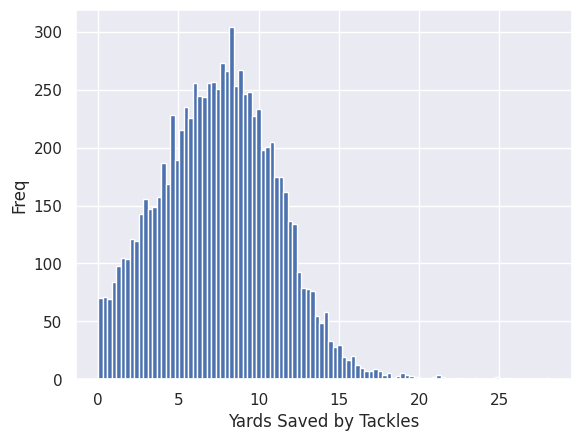

In [86]:
from sklearn.linear_model import LinearRegression

X = min_frameId_yf[["avg_s_downfield_plus_acc"]]  # Feature variable: Combined speed and acceleration
y = min_frameId_yf[["yards_forward"]]  # Target variable: Yards gained
reg = LinearRegression().fit(X, y)

# Use the fitted model to predict 'yards_saved'. The prediction is based on a new metric,
# which is the sum of downfield speed at the moment of tackling
# and the product of the median of total frames and average downfield acceleration.
min_frameId_yf["yards_saved"] = reg.predict(pd.DataFrame(min_frameId_yf["s_downfield"] +
                                                         min_frameId_yf["total_frame"].median() *
                                                         min_frameId_yf["avg_a_downfield"]))

# Plot a histogram of the predicted 'yards_saved' values
plt.hist(min_frameId_yf["yards_saved"][min_frameId_yf["yards_saved"] > 0], bins=100)
plt.xlabel("Yards Saved by Tackles")
plt.ylabel("Freq")
plt.show()

## New ranking based on our customed metric

In [133]:
def aggregate_yards_saved(df, method='sum'):
    """
    Aggregate yards saved by each player.

    Args:
        df (DataFrame): DataFrame containing player and yards saved data.
        method (str): Method to aggregate ('sum' or 'mean').

    Returns:
        Series: Aggregated yards saved by player.
    """
    if method == 'sum':
        return df.groupby('nflId_defender')['yards_saved'].sum()
    elif method == 'mean':
        return df.groupby('nflId_defender')['yards_saved'].mean()
    else:
        raise ValueError("Invalid method. Use 'sum' or 'mean'.")
def rank_players_by_yards_saved(yards_saved_series, top_n=5):
    """
    Rank players based on aggregated yards saved.

    Args:
        yards_saved_series (Series): Series with yards saved aggregated by player.
        top_n (int): Number of top players to return.

    Returns:
        DataFrame: Top players ranked by yards saved.
    """
    ranked_players = yards_saved_series.sort_values(ascending=False).head(top_n)
    return ranked_players
def get_player_info_with_yards_saved(player_ids, players_df, yards_saved_series):
    """
    Retrieve additional player information for given player IDs and include their yards saved.

    Args:
        player_ids (list): List of player IDs.
        players_df (DataFrame): DataFrame containing player data.
        yards_saved_series (Series): Series containing aggregated yards saved data.

    Returns:
        DataFrame: Player information with yards saved.
    """
    player_info_df = players_df[players_df['nflId'].isin(player_ids)]
    yards_saved_df = yards_saved_series.to_frame().reset_index()
    yards_saved_df.columns = ['nflId', 'yards_saved']

    player_info_with_yards_saved = pd.merge(player_info_df, yards_saved_df, on='nflId')
    return player_info_with_yards_saved
def merge_with_aggregated_stats(top_tacklers_info, player_stats_df):
    """
    Merges the top tacklers' info with their aggregated tackling statistics.

    Args:
        top_tacklers_info (DataFrame): DataFrame containing top tacklers' info and yards saved.
        player_stats_df (DataFrame): DataFrame with aggregated player stats.

    Returns:
        DataFrame: Merged DataFrame with yards saved and tackling statistics.
    """
    merged_df = pd.merge(top_tacklers_info, player_stats_df, on='nflId', how='left')
    merged_df_sorted = merged_df.sort_values(by='yards_saved', ascending=False)
    merged_df_sorted = merged_df_sorted.reset_index(drop=True)
    return merged_df_sorted

Finding "top tacklers" based on new metric

In [134]:
yards_saved = aggregate_yards_saved(min_frameId_yf, method='sum')
top_tacklers = rank_players_by_yards_saved(yards_saved, top_n=10)
top_tacklers_info_with_yards_saved = get_player_info_with_yards_saved(
    top_tacklers.index,
    players,
    top_tacklers
)
top_tacklers_info_with_yards_saved = merge_with_aggregated_stats(top_tacklers_info_with_yards_saved, player_tackle_stats_with_attributes)
top_tacklers_info_with_yards_saved

,nflId,height_x,weight_x,birthDate,collegeName,position_x,displayName_x,yards_saved,displayName_y,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height_y,weight_y,position_y,tackling_efficiency,height_in_inches
0,42427,6-1,236,1992-06-27,Texas,ILB,Jordan Hicks,418.075511,Jordan Hicks,54,20,0,5,6-1,236,ILB,0.915254,73
1,46269,6-2,215,1995-08-02,Yale,ILB,Foyesade Oluokun,417.937536,Foyesade Oluokun,59,26,0,11,6-2,215,ILB,0.842857,74
2,52435,6-1,245,1997-10-21,Texas Tech,ILB,Jordyn Brooks,414.204024,Jordyn Brooks,61,23,1,10,6-1,245,ILB,0.859155,73
3,46669,5-11,210,1995-07-22,Missouri Western,FS,Jonathan Owens,401.767624,Jonathan Owens,45,19,0,7,5-11,210,FS,0.865385,71
4,46304,6-0,236,1996-07-02,Syracuse,OLB,Zaire Franklin,401.562600,Zaire Franklin,55,28,0,12,6-0,236,OLB,0.820896,72
5,46077,6-0,230,1997-04-08,Georgia,ILB,Roquan Smith,359.098577,Roquan Smith,50,32,0,7,6-0,230,ILB,0.877193,72
6,44848,5-10,195,1996-01-10,Washington,SS,Budda Baker,354.999494,Budda Baker,44,26,1,11,5-10,195,SS,0.800000,70
7,53489,6-3,242,NaN,Ohio State,OLB,Pete Werner,348.210753,Pete Werner,51,22,2,8,6-3,242,OLB,0.864407,75
8,41243,6-2,250,1992-06-19,Alabama,ILB,C.J. Mosley,343.048524,C.J. Mosley,55,32,0,8,6-2,250,ILB,0.873016,74
9,47872,6-1,234,1996-07-29,Stanford,ILB,Bobby Okereke,325.221706,Bobby Okereke,48,23,1,4,6-1,234,ILB,0.923077,73


In [135]:
yards_saved = aggregate_yards_saved(min_frameId_yf, method='mean')
top_tacklers = rank_players_by_yards_saved(yards_saved, top_n=10)
top_tacklers_info_with_yards_saved = get_player_info_with_yards_saved(
    top_tacklers.index,
    players,
    top_tacklers
)
top_tacklers_info_with_yards_saved = merge_with_aggregated_stats(top_tacklers_info_with_yards_saved, player_tackle_stats_with_attributes)
top_tacklers_info_with_yards_saved

,nflId,height_x,weight_x,birthDate,collegeName,position_x,displayName_x,yards_saved,displayName_y,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height_y,weight_y,position_y,tackling_efficiency,height_in_inches
0,38852,5-11,195,1990-03-17,Stanford,SS,Michael Thomas,17.021097,Michael Thomas,1,1,0,0,5-11,195,SS,1.0,71
1,42376,6-0,218,1994-01-10,Alabama,SS,Landon Collins,14.162926,Landon Collins,1,0,0,0,6-0,218,SS,1.0,72
2,41786,6-2,270,1991-05-02,Texas Tech,DE,Kerry Hyder,14.043981,Kerry Hyder,3,2,0,0,6-2,270,DE,1.0,74
3,47832,6-3,252,1996-01-19,Texas Christian,DE,Ben Banogu,13.375982,Ben Banogu,1,1,0,1,6-3,252,DE,0.5,75
4,53530,6-3,213,NaN,Syracuse,CB,Ifeatu Melifonwu,13.095807,Ifeatu Melifonwu,1,0,0,0,6-3,213,CB,1.0,75
5,52863,6-1,235,1998-04-02,UCLA,ILB,Krys Barnes,12.684220,Krys Barnes,4,4,0,0,6-1,235,ILB,1.0,73
6,47890,6-7,272,1997-03-04,Iowa,OLB,Anthony Nelson,12.199357,Anthony Nelson,3,8,0,2,6-7,272,OLB,0.6,79
7,53887,6-3,277,NaN,Georgia,DE,Malik Herring,12.042497,Malik Herring,1,4,0,1,6-3,277,DE,0.5,75
8,40463,6-3,263,1991-07-02,Pennsylvania,OLB,Brandon Copeland,11.924045,Brandon Copeland,1,3,0,0,6-3,263,OLB,1.0,75
9,48487,5-9,185,1997-04-13,Buffalo,CB,Cameron Lewis,11.903886,Cameron Lewis,2,0,0,0,5-9,185,CB,1.0,69


In [136]:
def filter_players_by_min_tackles(df, min_tackles_required):
    """
    Filters players in the DataFrame based on a minimum number of tackle attempts.

    Args:
        df (DataFrame): DataFrame containing player tackling data.
        min_tackles_required (int): Minimum number of tackles required to include a player.

    Returns:
        DataFrame: Filtered DataFrame with players who meet the minimum tackle requirement.
    """
    # Calculate total tackles for each player
    total_tackles = df.groupby('nflId_defender')['tackle'].sum()

    # Filter players who meet the minimum tackle requirement
    eligible_players = total_tackles[total_tackles >= min_tackles_required].index

    # Return the filtered DataFrame
    return df[df['nflId_defender'].isin(eligible_players)]

In [139]:
# Use case Demo
min_tackles_required = 10  # Set the minimum number of tackles required
filtered_df = filter_players_by_min_tackles(min_frameId_yf, min_tackles_required)

# Proceed with yards saved calculation on the filtered DataFrame
yards_saved = aggregate_yards_saved(filtered_df, method='sum')
top_tacklers = rank_players_by_yards_saved(yards_saved, top_n=10)
top_tacklers_info_with_yards_saved = get_player_info_with_yards_saved(
    top_tacklers.index,
    players,
    top_tacklers
)
top_tacklers_info_with_yards_saved = merge_with_aggregated_stats(top_tacklers_info_with_yards_saved, player_tackle_stats_with_attributes)
top_tacklers_info_with_yards_saved

,nflId,height_x,weight_x,birthDate,collegeName,position_x,displayName_x,yards_saved,displayName_y,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height_y,weight_y,position_y,tackling_efficiency,height_in_inches
0,42427,6-1,236,1992-06-27,Texas,ILB,Jordan Hicks,418.075511,Jordan Hicks,54,20,0,5,6-1,236,ILB,0.915254,73
1,46269,6-2,215,1995-08-02,Yale,ILB,Foyesade Oluokun,417.937536,Foyesade Oluokun,59,26,0,11,6-2,215,ILB,0.842857,74
2,52435,6-1,245,1997-10-21,Texas Tech,ILB,Jordyn Brooks,414.204024,Jordyn Brooks,61,23,1,10,6-1,245,ILB,0.859155,73
3,46669,5-11,210,1995-07-22,Missouri Western,FS,Jonathan Owens,401.767624,Jonathan Owens,45,19,0,7,5-11,210,FS,0.865385,71
4,46304,6-0,236,1996-07-02,Syracuse,OLB,Zaire Franklin,401.562600,Zaire Franklin,55,28,0,12,6-0,236,OLB,0.820896,72
5,46077,6-0,230,1997-04-08,Georgia,ILB,Roquan Smith,359.098577,Roquan Smith,50,32,0,7,6-0,230,ILB,0.877193,72
6,44848,5-10,195,1996-01-10,Washington,SS,Budda Baker,354.999494,Budda Baker,44,26,1,11,5-10,195,SS,0.800000,70
7,53489,6-3,242,NaN,Ohio State,OLB,Pete Werner,348.210753,Pete Werner,51,22,2,8,6-3,242,OLB,0.864407,75
8,41243,6-2,250,1992-06-19,Alabama,ILB,C.J. Mosley,343.048524,C.J. Mosley,55,32,0,8,6-2,250,ILB,0.873016,74
9,47872,6-1,234,1996-07-29,Stanford,ILB,Bobby Okereke,325.221706,Bobby Okereke,48,23,1,4,6-1,234,ILB,0.923077,73


In [140]:
min_tackles_required = 10  # Set the minimum number of tackles required
filtered_df = filter_players_by_min_tackles(min_frameId_yf, min_tackles_required)

# Proceed with yards saved calculation on the filtered DataFrame
yards_saved = aggregate_yards_saved(filtered_df, method='mean')
top_tacklers = rank_players_by_yards_saved(yards_saved, top_n=10)
top_tacklers_info_with_yards_saved = get_player_info_with_yards_saved(
    top_tacklers.index,
    players,
    top_tacklers
)
top_tacklers_info_with_yards_saved = merge_with_aggregated_stats(top_tacklers_info_with_yards_saved, player_tackle_stats_with_attributes)
top_tacklers_info_with_yards_saved

,nflId,height_x,weight_x,birthDate,collegeName,position_x,displayName_x,yards_saved,displayName_y,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height_y,weight_y,position_y,tackling_efficiency,height_in_inches
0,43316,6-3,314,1995-10-04,UCLA,NT,Kenny Clark,10.033894,Kenny Clark,13,18,0,1,6-3,314,NT,0.928571,75
1,44991,6-3,311,1994-11-11,Louisiana State,NT,Davon Godchaux,9.893631,Davon Godchaux,12,18,0,2,6-3,311,NT,0.857143,75
2,40347,6-3,328,1991-04-20,Wyoming,NT,Mike Purcell,9.756113,Mike Purcell,10,12,0,2,6-3,328,NT,0.833333,75
3,46074,6-4,275,1996-06-24,North Carolina State,OLB,Bradley Chubb,9.665044,Bradley Chubb,11,11,0,6,6-4,275,OLB,0.647059,76
4,38551,6-5,265,1990-02-27,Syracuse,DE,Chandler Jones,9.579503,Chandler Jones,11,5,0,5,6-5,265,DE,0.687500,77
5,46097,6-1,217,1997-01-20,Virginia Tech,SS,Terrell Edmunds,9.569908,Terrell Edmunds,19,12,0,5,6-1,217,SS,0.791667,73
6,46117,6-2,251,1996-12-28,Southern California,OLB,Uchenna Nwosu,9.505537,Uchenna Nwosu,18,15,1,6,6-2,251,OLB,0.750000,74
7,53581,6-1,205,NaN,Texas,FS,Caden Sterns,9.467835,Caden Sterns,14,7,0,5,6-1,205,FS,0.736842,73
8,37778,6-1,235,1989-08-24,Auburn,ILB,Josh Bynes,9.296672,Josh Bynes,18,10,0,3,6-1,235,ILB,0.857143,73
9,54543,6-7,270,NaN,Alabama-Birmingham,DE,Alex Wright,9.236024,Alex Wright,11,3,0,2,6-7,270,DE,0.846154,79


More visual comparisons with the old ranking based on tackle efficiency

In [162]:
# Find the best players based on the efficiency metric (tie break rule: total_tackles)
efficiency_filtered_df = player_tackle_stats_with_attributes[player_tackle_stats_with_attributes['total_tackles'] >= min_tackles_required]
efficiency_ranked = efficiency_filtered_df.sort_values(by=['tackling_efficiency', 'total_tackles'], ascending=[False, False])
top_efficiency_players = efficiency_ranked.head(10)
top_efficiency_players

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height,weight,position,tackling_efficiency,height_in_inches
415,47877,Jamel Dean,27,8,0,0,6-1,206,CB,1.0,73
368,46757,Charvarius Ward,25,9,1,0,6-1,195,CB,1.0,73
38,38868,Tashaun Gipson,22,5,0,0,6-1,212,FS,1.0,73
527,52515,Akeem Davis-Gaither,21,10,0,0,6-2,215,OLB,1.0,74
438,47947,E.J. Speed,18,11,0,0,6-4,230,OLB,1.0,76
18,37724,Chris Harris,16,1,1,0,5-10,199,CB,1.0,70
397,47826,Jahlani Tavai,14,15,0,0,6-2,250,ILB,1.0,74
548,52619,Isaiah Rodgers,12,6,1,0,5-10,170,CB,1.0,70
89,42349,Leonard Williams,11,7,0,0,6-5,302,DT,1.0,77
199,44823,Marshon Lattimore,11,5,0,0,6-0,192,CB,1.0,72


In [158]:
yards_saved

nflId_defender
35459    6.456745
35466    6.067341
35562    6.293233
37078    5.553590
37097    8.370771
           ...   
54677    3.572342
54704    7.133189
54708    4.547171
54778    5.573725
54936    5.822237
Name: yards_saved, Length: 368, dtype: float64

In [159]:
yards_saved_df = yards_saved.reset_index()
yards_saved_df.columns = ['nflId_defender', 'yards_saved']
yards_saved_df

,nflId_defender,yards_saved
0,35459,6.456745
1,35466,6.067341
2,35562,6.293233
3,37078,5.553590
4,37097,8.370771
...,...,...
363,54677,3.572342
364,54704,7.133189
365,54708,4.547171
366,54778,5.573725


In [163]:
top_efficiency_players_with_yards = pd.merge(top_efficiency_players, yards_saved_df, left_on='nflId', right_on='nflId_defender', how='left')
top_efficiency_players_with_yards.drop('nflId_defender', axis=1, inplace=True)
top_efficiency_players_with_yards

,nflId,displayName,total_tackles,total_assists,total_forced_fumbles,total_missed_tackles,height,weight,position,tackling_efficiency,height_in_inches,yards_saved
0,47877,Jamel Dean,27,8,0,0,6-1,206,CB,1.0,73,3.055057
1,46757,Charvarius Ward,25,9,1,0,6-1,195,CB,1.0,73,4.367176
2,38868,Tashaun Gipson,22,5,0,0,6-1,212,FS,1.0,73,7.604543
3,52515,Akeem Davis-Gaither,21,10,0,0,6-2,215,OLB,1.0,74,4.759936
4,47947,E.J. Speed,18,11,0,0,6-4,230,OLB,1.0,76,8.216281
5,37724,Chris Harris,16,1,1,0,5-10,199,CB,1.0,70,5.184465
6,47826,Jahlani Tavai,14,15,0,0,6-2,250,ILB,1.0,74,6.713605
7,52619,Isaiah Rodgers,12,6,1,0,5-10,170,CB,1.0,70,5.252044
8,42349,Leonard Williams,11,7,0,0,6-5,302,DT,1.0,77,9.215351
9,44823,Marshon Lattimore,11,5,0,0,6-0,192,CB,1.0,72,2.011753


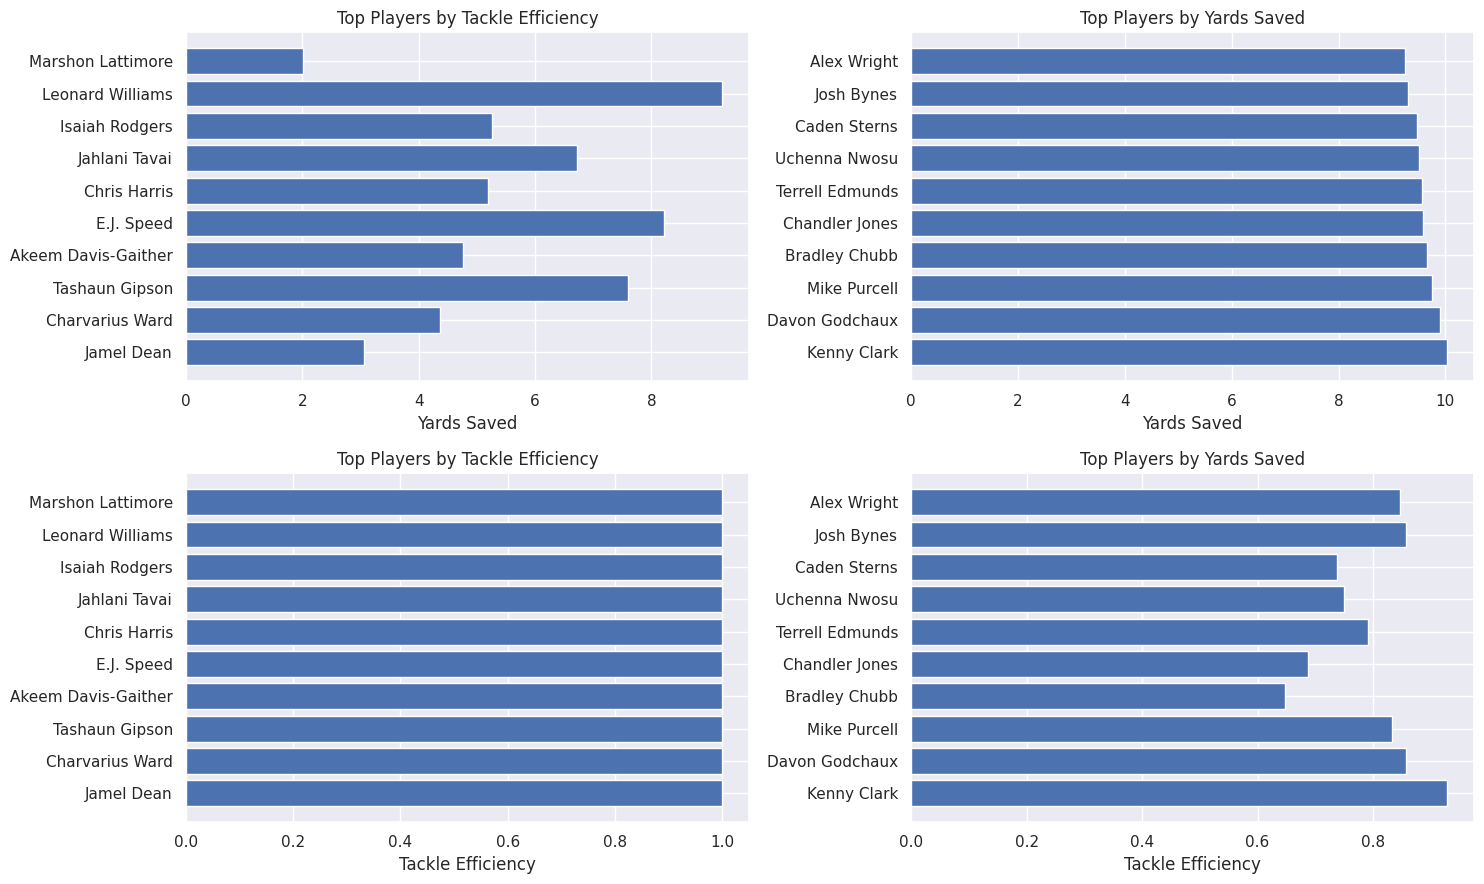

In [173]:
def compare_rankings(top_efficiency, top_yards_saved):
    """
    Compares the top players from efficiency and yards saved rankings.

    Args:
        top_efficiency (DataFrame): Top players from the efficiency ranking.
        top_yards_saved (DataFrame): Top players from the yards saved ranking.
        N (int): Number of top players to compare.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 9))

    # Plotting top players from efficiency ranking
    axes[0,0].barh(top_efficiency['displayName'], top_efficiency['yards_saved'])
    axes[0,0].set_xlabel('Yards Saved')
    axes[0,0].set_title(f'Top Players by Tackle Efficiency')

    axes[1,0].barh(top_efficiency['displayName'], top_efficiency['tackling_efficiency'])
    axes[1,0].set_xlabel('Tackle Efficiency')
    axes[1,0].set_title(f'Top Players by Tackle Efficiency')

    # Plotting top players from yards saved ranking
    axes[0,1].barh(top_yards_saved['displayName_x'], top_yards_saved['yards_saved'])
    axes[0,1].set_xlabel('Yards Saved')
    axes[0,1].set_title(f'Top Players by Yards Saved')

    axes[1,1].barh(top_yards_saved['displayName_x'], top_yards_saved['tackling_efficiency'])
    axes[1,1].set_xlabel('Tackle Efficiency')
    axes[1,1].set_title(f'Top Players by Yards Saved')

    plt.tight_layout()
    plt.show()

# Call the function with the top players from both metrics
compare_rankings(top_efficiency_players_with_yards, top_tacklers_info_with_yards_saved)

In [187]:
def plot_grouped_bar_chart(df, metrics, player_name_col='displayName', title='Comparison of Player Performance Metrics'):
    """
    Plots a grouped bar chart for multiple metrics of players.

    Args:
        df (DataFrame): DataFrame containing the player stats.
        metrics (list): List of metrics to plot.
        player_name_col (str): Column name for player names.
        title (str): Title of the plot
    """
    n_metrics = len(metrics)
    bar_width = 0.15  # Width of the bars
    indices = np.arange(len(df))

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, metric in enumerate(metrics):
        ax.bar(indices + i * bar_width, df[metric], bar_width, label=metric)

    ax.set_xlabel('Players')
    ax.set_ylabel('Metrics')
    ax.set_title(title)
    ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
    ax.set_xticklabels(df[player_name_col], rotation=45)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

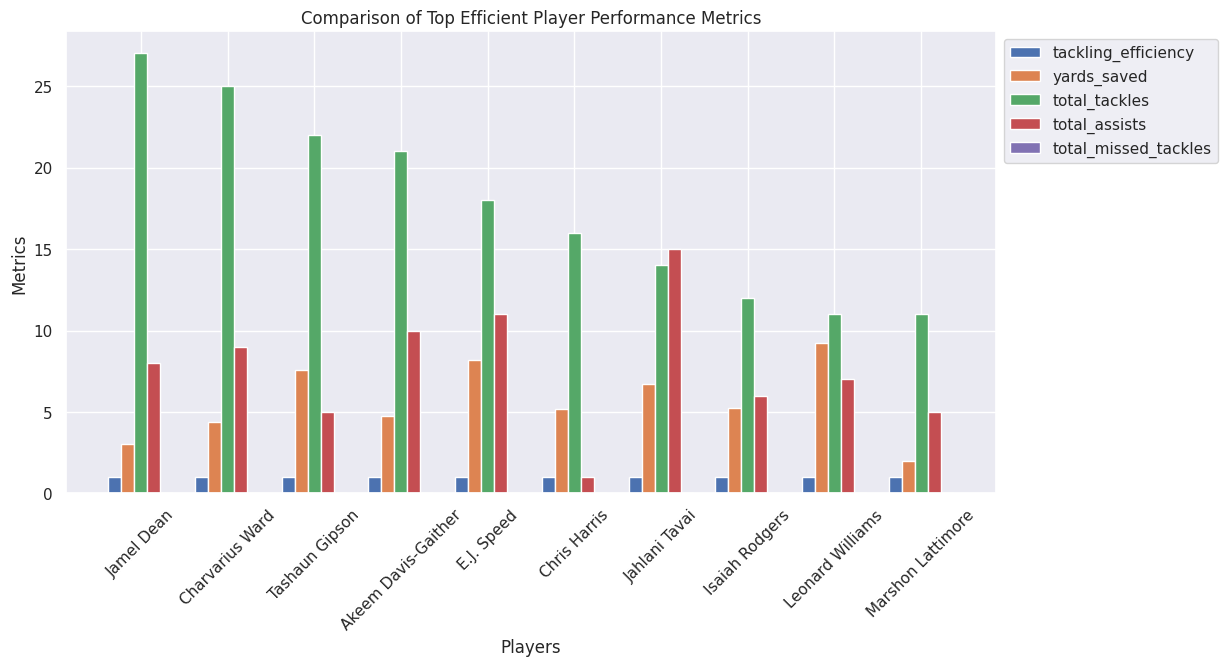

In [188]:
plot_grouped_bar_chart(top_efficiency_players_with_yards,
                      ['tackling_efficiency', 'yards_saved', 'total_tackles', 'total_assists', 'total_missed_tackles'],
                       title = 'Comparison of Top Efficient Player Performance Metrics')

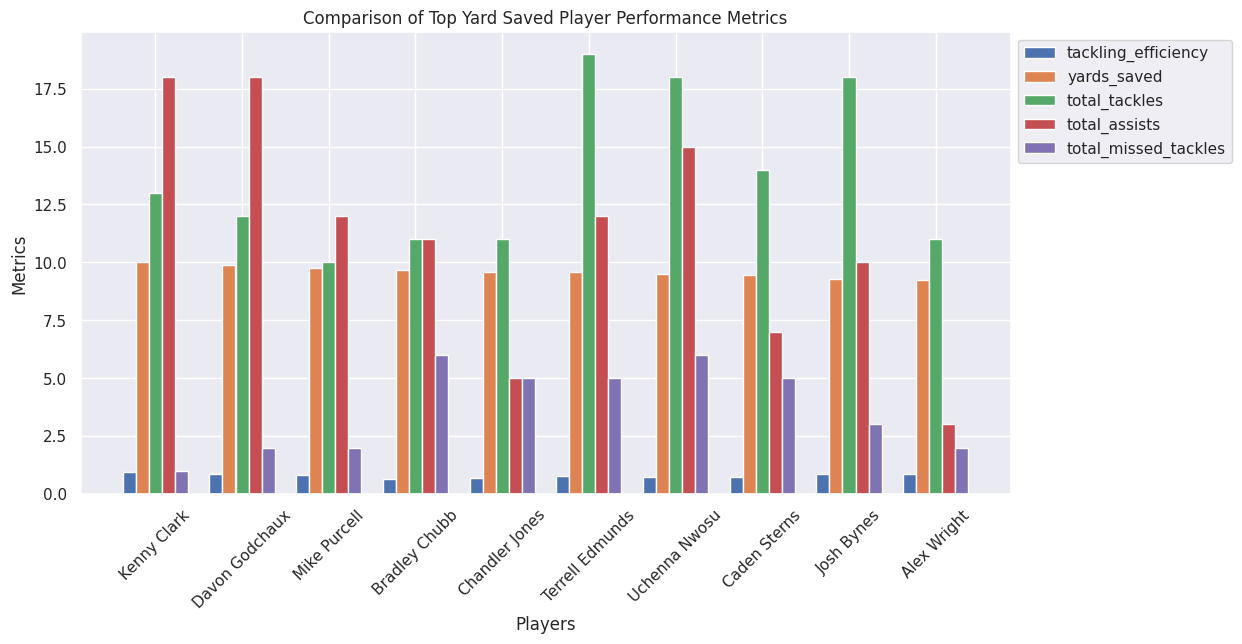

In [189]:
plot_grouped_bar_chart(top_tacklers_info_with_yards_saved,
                      ['tackling_efficiency', 'yards_saved', 'total_tackles', 'total_assists', 'total_missed_tackles'],
                       player_name_col = 'displayName_x',
                       title = 'Comparison of Top Yard Saved Player Performance Metrics')